### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import datetime as dt

from matplotlib import style
style.use('ggplot')

In [2]:
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Setting the plot size for all the figures
plt.rcParams['figure.figsize']=(8,6)

In [4]:
pd.set_option('display.max_columns',None)

### Importing the data

In [5]:
train = pd.read_csv('train.csv')
train.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [6]:
test = pd.read_csv('test.csv')
test.head()

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

In [7]:
stores = pd.read_csv('stores.csv')
stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [8]:
features = pd.read_csv('features.csv')
features.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [9]:
# Shape and Info of each data:
display(train.shape)
display(test.shape)
display(stores.shape)
display(features.shape)

(421570, 5)

(115064, 4)

(45, 3)

(8190, 12)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [12]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


Will merge the train data and test data respectively at stores, department and week level before doing data exploration and preprocessing the data.

### Data Preparation

In [14]:
# Merging the Train data:

# Step 1: Combine the Stores data with Train:

df_train_stores = train.merge(stores, on='Store', how='left')
df_train_stores.head()

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size
0      1     1  2010-02-05      24924.50      False    A  151315
1      1     1  2010-02-12      46039.49       True    A  151315
2      1     1  2010-02-19      41595.55      False    A  151315
3      1     1  2010-02-26      19403.54      False    A  151315
4      1     1  2010-03-05      21827.90      False    A  151315

In [15]:
# Step 2: Combine the stores + train data with Features:

df_train = df_train_stores.merge(features, on=['Store', 'Date','IsHoliday'], how='left')
df_train.head()

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1  2010-02-05      24924.50      False    A  151315        42.31   
1      1     1  2010-02-12      46039.49       True    A  151315        38.51   
2      1     1  2010-02-19      41595.55      False    A  151315        39.93   
3      1     1  2010-02-26      19403.54      False    A  151315        46.63   
4      1     1  2010-03-05      21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [16]:
# Merging the Test data:

# Step 1: Combine the Stores data with Test:

df_test_stores = test.merge(stores, on='Store', how='left')
df_test_stores.head()

Store  Dept        Date  IsHoliday Type    Size
0      1     1  2012-11-02      False    A  151315
1      1     1  2012-11-09      False    A  151315
2      1     1  2012-11-16      False    A  151315
3      1     1  2012-11-23       True    A  151315
4      1     1  2012-11-30      False    A  151315

In [17]:
# Step 2: Combine the stores + train data with Features:

df_test = df_test_stores.merge(features, on=['Store', 'Date','IsHoliday'], how='left')
df_test.head()

Store  Dept        Date  IsHoliday Type    Size  Temperature  Fuel_Price  \
0      1     1  2012-11-02      False    A  151315        55.32       3.386   
1      1     1  2012-11-09      False    A  151315        61.24       3.314   
2      1     1  2012-11-16      False    A  151315        52.92       3.252   
3      1     1  2012-11-23       True    A  151315        56.23       3.211   
4      1     1  2012-11-30      False    A  151315        52.34       3.207   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0    6766.44    5147.70      50.82    3639.90    2737.42  223.462779   
1   11421.32    3370.89      40.28    4646.79    6154.16  223.481307   
2    9696.28     292.10     103.78    1133.15    6612.69  223.512911   
3     883.59       4.17   74910.32     209.91     303.32  223.561947   
4    2460.03        NaN    3838.35     150.57    6966.34  223.610984   

   Unemployment  
0         6.573  
1         6.573  
2         6.573  
3         6.573  
4         6.573

In [18]:
print('The merged train data has {} records, {} stores and {} features.'.format(df_train.shape[0], len(stores), df_train.shape[1]))
print('The merged test data has {} records, {} stores and {} features.'.format(df_test.shape[0], len(stores), df_test.shape[1]))

The merged train data has 421570 records, 45 stores and 16 features.
The merged test data has 115064 records, 45 stores and 15 features.


### Summary Statistics

In [19]:
# Data Summary for continuous variables:

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(), 
        x.quantile(0.01), x.quantile(0.05), x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                     
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [20]:
num_features = df_train.select_dtypes([np.number])
num_features.apply(var_summary).T

N     NMISS           SUM           MEAN        MEDIAN  \
Store         421570.0       0.0  9.359084e+06      22.200546      22.00000   
Dept          421570.0       0.0  1.865882e+07      44.260317      37.00000   
Weekly_Sales  421570.0       0.0  6.737219e+09   15981.258123    7612.03000   
Size          421570.0       0.0  5.764039e+10  136727.915739  140167.00000   
Temperature   421570.0       0.0  2.533217e+07      60.090059      62.09000   
Fuel_Price    421570.0       0.0  1.416908e+06       3.361027       3.45200   
MarkDown1     150681.0  270889.0  1.091898e+09    7246.420196    5347.45000   
MarkDown2     111248.0  310322.0  3.709708e+08    3334.628621     192.00000   
MarkDown3     137091.0  284479.0  1.973317e+08    1439.421384      24.60000   
MarkDown4     134967.0  286603.0  4.566161e+08    3383.168256    1481.31000   
MarkDown5     151432.0  270138.0  7.009750e+08    4628.975079    3359.45000   
CPI           421570.0       0.0  7.217360e+07     171.201947     182.31878   
Unemployment  421570.0       0.0  3.355819e+06       7.960289       7.86600   

                       STD           VAR        MIN            P1  \
Store            12.785297  1.634638e+02      1.000      1.000000   
Dept             30.492054  9.297654e+02      1.000      1.000000   
Weekly_Sales  22711.183519  5.157979e+08  -4988.940      5.000000   
Size          60980.583328  3.718632e+09  34875.000  34875.000000   
Temperature      18.447931  3.403262e+02     -2.060     18.300000   
Fuel_Price        0.458515  2.102356e-01      2.472      2.565000   
MarkDown1      8291.221345  6.874435e+07      0.270     17.760000   
MarkDown2      9475.357325  8.978240e+07   -265.760     -0.990000   
MarkDown3      9623.078290  9.260364e+07    -29.100      0.060000   
MarkDown4      6292.384031  3.959410e+07      0.220      3.970000   
MarkDown5      5962.887455  3.555603e+07    135.160    351.970000   
CPI              39.159276  1.533449e+03    126.064    126.111903   
Unemployment      1.863296  3.471872e+00      3.879      4.156000   

                        P5           P10           P25           P50  \
Store             3.000000      5.000000     11.000000      22.00000   
Dept              4.000000      7.000000     18.000000      37.00000   
Weekly_Sales     59.974500    291.097000   2079.650000    7612.03000   
Size          39690.000000  39910.000000  93638.000000  140167.00000   
Temperature      27.310000     33.980000     46.680000      62.09000   
Fuel_Price        2.653000      2.720000      2.933000       3.45200   
MarkDown1       149.190000    375.200000   2240.270000    5347.45000   
MarkDown2         1.950000      6.980000     41.600000     192.00000   
MarkDown3         0.650000      1.650000      5.080000      24.60000   
MarkDown4        28.760000    108.710000    504.220000    1481.31000   
MarkDown5       715.520000   1070.830000   1878.440000    3359.45000   
CPI             126.496258    128.823806    132.022667     182.31878   
Unemployment      5.326000      5.965000      6.891000       7.86600   

                        P75            P90            P95            P99  \
Store             33.000000      40.000000      43.000000      45.000000   
Dept              74.000000      92.000000      95.000000      98.000000   
Weekly_Sales   20205.852500   42845.673000   61201.951000  106479.586000   
Size          202505.000000  204184.000000  206302.000000  219622.000000   
Temperature       74.280000      83.580000      87.270000      92.810000   
Fuel_Price         3.738000       3.917000       4.029000       4.202000   
MarkDown1       9210.900000   15282.470000   21801.350000   41524.030000   
MarkDown2       1926.940000    8549.740000   16497.470000   50366.600000   
MarkDown3        103.990000     400.090000    1059.900000   63143.290000   
MarkDown4       3595.040000    7871.420000   12645.960000   35785.260000   
MarkDown5       5563.800000    8337.700000   11269.240000   27754.230000   
CPI              212.41699

In [21]:
# Summary Statistics for Numerical Variables in Train data: 
df_train.describe()

Store           Dept   Weekly_Sales           Size  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123  136727.915739   
std        12.785297      30.492054   22711.183519   60980.583328   
min         1.000000       1.000000   -4988.940000   34875.000000   
25%        11.000000      18.000000    2079.650000   93638.000000   
50%        22.000000      37.000000    7612.030000  140167.000000   
75%        33.000000      74.000000   20205.852500  202505.000000   
max        45.000000      99.000000  693099.360000  219622.000000   

         Temperature     Fuel_Price      MarkDown1      MarkDown2  \
count  421570.000000  421570.000000  150681.000000  111248.000000   
mean       60.090059       3.361027    7246.420196    3334.628621   
std        18.447931       0.458515    8291.221345    9475.357325   
min        -2.060000       2.472000       0.270000    -265.760000   
25%        46.680000       2.933000    2240.270000      41.600000   
50%        62.090000       3.452000    5347.450000     192.000000   
75%        74.280000       3.738000    9210.900000    1926.940000   
max       100.140000       4.468000   88646.760000  104519.540000   

           MarkDown3      MarkDown4      MarkDown5            CPI  \
count  137091.000000  134967.000000  151432.000000  421570.000000   
mean     1439.421384    3383.168256    4628.975079     171.201947   
std      9623.078290    6292.384031    5962.887455      39.159276   
min       -29.100000       0.220000     135.160000     126.064000   
25%         5.080000     504.220000    1878.440000     132.022667   
50%        24.600000    1481.310000    3359.450000     182.318780   
75%       103.990000    3595.040000    5563.800000     212.416993   
max    141630.610000   67474.850000  108519.280000     227.232807   

        Unemployment  
count  421570.000000  
mean        7.960289  
std         1.863296  
min         3.879000  
25%         6.891000  
50%         7.866000  
75%         8.572000  
max        14.313000

In [22]:
# Summary Statistics for Categorical Variables in Train data: 
df_train.describe(exclude=[np.number])

Date IsHoliday    Type
count       421570    421570  421570
unique         143         2       3
top     2011-12-23     False       A
freq          3027    391909  215478

In [22]:
num_features_test = df_test.select_dtypes([np.number])
num_features_test.apply(var_summary).T

N    NMISS           SUM           MEAN         MEDIAN  \
Store         115064.0      0.0  2.558817e+06      22.238207      22.000000   
Dept          115064.0      0.0  5.101883e+06      44.339524      37.000000   
Size          115064.0      0.0  1.570597e+10  136497.688921  140167.000000   
Temperature   115064.0      0.0  6.206760e+06      53.941804      54.470000   
Fuel_Price    115064.0      0.0  4.121070e+05       3.581546       3.606000   
MarkDown1     114915.0    149.0  8.836063e+08    7689.216439    4842.290000   
MarkDown2      86437.0  28627.0  3.227602e+08    3734.051729     742.590000   
MarkDown3     105235.0   9829.0  2.528890e+08    2403.088666      78.260000   
MarkDown4     102176.0  12888.0  3.429250e+08    3356.219071     840.940000   
MarkDown5     115064.0      0.0  4.513594e+08    3922.681189    2390.430000   
CPI            76902.0  38162.0  1.360868e+07     176.961347     192.304445   
Unemployment   76902.0  38162.0  5.282193e+05       6.868733       6.806000   

                       STD           VAR           MIN            P1  \
Store            12.809930  1.640943e+02      1.000000      1.000000   
Dept             30.656410  9.398155e+02      1.000000      1.000000   
Size          61106.926438  3.734056e+09  34875.000000  34875.000000   
Temperature      18.724153  3.505939e+02     -7.290000     11.440000   
Fuel_Price        0.239442  5.733244e-02      2.872000      2.957000   
MarkDown1     10698.760716  1.144635e+08  -2781.450000     20.840000   
MarkDown2      8323.495014  6.928057e+07    -35.740000      0.020000   
MarkDown3     13767.939313  1.895562e+08   -179.260000      0.150000   
MarkDown4      7570.501545  5.731249e+07      0.220000      2.610000   
MarkDown5     19445.150745  3.781139e+08   -185.170000    269.300000   
CPI              41.239967  1.700735e+03    131.236226    131.279355   
Unemployment      1.583427  2.507242e+00      3.684000      3.879000   

                      P5           P10           P25            P50  \
Store             3.0000      5.000000     11.000000      22.000000   
Dept              4.0000      7.000000     18.000000      37.000000   
Size          39690.0000  39910.000000  93638.000000  140167.000000   
Temperature      23.9800     29.970000     39.820000      54.470000   
Fuel_Price        3.1610      3.227000      3.431000       3.606000   
MarkDown1       189.4900    457.660000   1966.460000    4842.290000   
MarkDown2         6.1400     25.770000    180.350000     742.590000   
MarkDown3         1.1800      3.100000     15.100000      78.260000   
MarkDown4        16.9600     37.360000    155.460000     840.940000   
MarkDown5       540.8900    770.883000   1309.300000    2390.430000   
CPI             131.4784    132.030871    138.402033     192.304445   
Unemployment      3.9320      5.049000      5.771000       6.806000   

                        P75            P90            P95            P99  \
Store             33.000000      40.000000      43.000000      45.000000   
Dept              74.000000      92.000000      95.000000      98.000000   
Size          202505.000000  204184.000000  206302.000000  219622.000000   
Temperature       67.350000      79.480000      83.820000      92.140000   
Fuel_Price         3.766000       3.866000       3.951000       4.079000   
MarkDown1       9439.140000   15325.040000   23140.880000   65757.570000   
MarkDown2       2735.670000    9277.290000   22671.670000   42920.210000   
MarkDown3        272.580000     698.930000    2361.570000   86476.660000   
MarkDown4       3096.920000    7674.410000   14191.010000   44739.280000   
MarkDown5       4227.270000    6966.340000    9316.710000   18599.300000   
CPI              223.244532     225.898059     227.784753     228.729864   
Unemployment       8.036000       8.934000       9.910000      10.199000   

                        MAX  
Store             45.000000  
Dept              99.000000  
Size          219622.000000  
Temperature      101.95

In [23]:
# Summary Statistics for Numerical Variables in Test data: 
df_test.describe()

Store           Dept           Size    Temperature  \
count  115064.000000  115064.000000  115064.000000  115064.000000   
mean       22.238207      44.339524  136497.688921      53.941804   
std        12.809930      30.656410   61106.926438      18.724153   
min         1.000000       1.000000   34875.000000      -7.290000   
25%        11.000000      18.000000   93638.000000      39.820000   
50%        22.000000      37.000000  140167.000000      54.470000   
75%        33.000000      74.000000  202505.000000      67.350000   
max        45.000000      99.000000  219622.000000     101.950000   

          Fuel_Price      MarkDown1     MarkDown2      MarkDown3  \
count  115064.000000  114915.000000  86437.000000  105235.000000   
mean        3.581546    7689.216439   3734.051729    2403.088666   
std         0.239442   10698.760716   8323.495014   13767.939313   
min         2.872000   -2781.450000    -35.740000    -179.260000   
25%         3.431000    1966.460000    180.350000      15.100000   
50%         3.606000    4842.290000    742.590000      78.260000   
75%         3.766000    9439.140000   2735.670000     272.580000   
max         4.125000  103184.980000  71074.170000  149483.310000   

           MarkDown4      MarkDown5           CPI  Unemployment  
count  102176.000000  115064.000000  76902.000000  76902.000000  
mean     3356.219071    3922.681189    176.961347      6.868733  
std      7570.501545   19445.150745     41.239967      1.583427  
min         0.220000    -185.170000    131.236226      3.684000  
25%       155.460000    1309.300000    138.402033      5.771000  
50%       840.940000    2390.430000    192.304445      6.806000  
75%      3096.920000    4227.270000    223.244532      8.036000  
max     65344.640000  771448.100000    228.976456     10.199000

In [24]:
# Summary Statistics for Categorical Variables in Test data: 
df_test.describe(exclude=[np.number])

Date IsHoliday    Type
count       115064    115064  115064
unique          39         2       3
top     2012-12-21     False       A
freq          3002    106136   58713

### Missing Values

In [25]:
# Checking for Null Values in Train Data:

total_train = df_train.isnull().sum()

count_train = len(df_train)

percent_train = (total_train/count_train)*100

missing_values_train = pd.concat([total_train, percent_train],axis=1, keys= ['Count of Missing Values', 'Percentage of Missing Values'])
missing_values_train = missing_values_train.sort_values('Count of Missing Values',ascending=False)
missing_values_train

Count of Missing Values  Percentage of Missing Values
MarkDown2                      310322                     73.611025
MarkDown4                      286603                     67.984676
MarkDown3                      284479                     67.480845
MarkDown1                      270889                     64.257181
MarkDown5                      270138                     64.079038
Store                               0                      0.000000
Dept                                0                      0.000000
Date                                0                      0.000000
Weekly_Sales                        0                      0.000000
IsHoliday                           0                      0.000000
Type                                0                      0.000000
Size                                0                      0.000000
Temperature                         0                      0.000000
Fuel_Price                          0                      0.000000
CPI                                 0                      0.000000
Unemployment                        0                      0.000000

In [26]:
# Checking for Null Values in Test Data:

total_test = df_test.isnull().sum()

count_test= len(df_test)

percent_test = (total_test/count_test)*100

missing_values_test = pd.concat([total_test, percent_test],axis=1, keys= ['Count of Missing Values', 'Percentage of Missing Values'])
missing_values_test = missing_values_test.sort_values('Count of Missing Values',ascending=False)
missing_values_test

Count of Missing Values  Percentage of Missing Values
CPI                             38162                     33.165890
Unemployment                    38162                     33.165890
MarkDown2                       28627                     24.879198
MarkDown4                       12888                     11.200723
MarkDown3                        9829                      8.542203
MarkDown1                         149                      0.129493
Store                               0                      0.000000
Dept                                0                      0.000000
Date                                0                      0.000000
IsHoliday                           0                      0.000000
Type                                0                      0.000000
Size                                0                      0.000000
Temperature                         0                      0.000000
Fuel_Price                          0                      0.000000
MarkDown5                           0                      0.000000

The missing values variables Markdown1, Markdown2, Markdown3, Markdown4, Markdown5 have more than 25% missing values are filled with 0 for both train and test. The missing values in the CPI and Unemployment variables in the Test set with median.

In [27]:
# Imputation for Markdown variables with 0 in the train and test data:

# Train data set:
df_train['MarkDown1'] = df_train['MarkDown1'].fillna(0)
df_train['MarkDown2'] = df_train['MarkDown2'].fillna(0)
df_train['MarkDown3'] = df_train['MarkDown3'].fillna(0)
df_train['MarkDown4'] = df_train['MarkDown4'].fillna(0)
df_train['MarkDown5'] = df_train['MarkDown5'].fillna(0)

# Test data set:

df_test['MarkDown1'] = df_test['MarkDown1'].fillna(0)
df_test['MarkDown2'] = df_test['MarkDown2'].fillna(0)
df_test['MarkDown3'] = df_test['MarkDown3'].fillna(0)
df_test['MarkDown4'] = df_test['MarkDown4'].fillna(0)
df_test['MarkDown5'] = df_test['MarkDown5'].fillna(0)

In [28]:
# Median Imputation for CPI and unmployement in the test data:

df_test['CPI'] = df_test['CPI'].fillna(df_test['CPI'].median())
df_test['Unemployment'] = df_test['Unemployment'].fillna(df_test['Unemployment'].median())

#### Identifying Numerical and Categorical Variables

In [29]:
# Numerical Variables:

num_vars = df_test.dtypes[(df_test.dtypes == 'int64') | (df_test.dtypes == 'float64')].index.to_list()
print(num_vars)

['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']


In [30]:
# Numerical Variables:

# num_vars_test = df_test.dtypes[(df_test.dtypes == 'int64') | (df_test.dtypes == 'float64')].index.to_list()
# print(num_vars_test)

In [31]:
# Date features in both train and test:  Date

In [32]:
# Categorical Variables:

cat_vars = df_test.dtypes[(df_test.dtypes == 'object') | (df_test.dtypes == 'bool')].index.to_list()
print(cat_vars)

['Date', 'IsHoliday', 'Type']


### Negative Values

In [33]:
num_df_train = df_train[num_vars]
num_df_train.head()

Store  Dept    Size  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1     1  151315        42.31       2.572        0.0        0.0   
1      1     1  151315        38.51       2.548        0.0        0.0   
2      1     1  151315        39.93       2.514        0.0        0.0   
3      1     1  151315        46.63       2.561        0.0        0.0   
4      1     1  151315        46.50       2.625        0.0        0.0   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
0        0.0        0.0        0.0  211.096358         8.106  
1        0.0        0.0        0.0  211.242170         8.106  
2        0.0        0.0        0.0  211.289143         8.106  
3        0.0        0.0        0.0  211.319643         8.106  
4        0.0        0.0        0.0  211.350143         8.106

In [34]:
num_df_test = df_test[num_vars]
num_df_test.head()

Store  Dept    Size  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1     1  151315        55.32       3.386    6766.44    5147.70   
1      1     1  151315        61.24       3.314   11421.32    3370.89   
2      1     1  151315        52.92       3.252    9696.28     292.10   
3      1     1  151315        56.23       3.211     883.59       4.17   
4      1     1  151315        52.34       3.207    2460.03       0.00   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
0      50.82    3639.90    2737.42  223.462779         6.573  
1      40.28    4646.79    6154.16  223.481307         6.573  
2     103.78    1133.15    6612.69  223.512911         6.573  
3   74910.32     209.91     303.32  223.561947         6.573  
4    3838.35     150.57    6966.34  223.610984         6.573

In [35]:
# Checking if any negative values present in the Train data: 

neg_train = num_df_train.columns[(num_df_train < 0).any()].tolist()
neg_train

['Temperature', 'MarkDown2', 'MarkDown3']

In [36]:
# checking for Negative values in Weekly Sales as the variable is not part of the num_vars defined:
df_train.loc[df_train['Weekly_Sales'] < 0]

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  \
846         1     6  2012-08-10       -139.65      False    A  151315   
2384        1    18  2012-05-04         -1.27      False    A  151315   
6048        1    47  2010-02-19       -863.00      False    A  151315   
6049        1    47  2010-03-12       -698.00      False    A  151315   
6051        1    47  2010-10-08        -58.00      False    A  151315   
...       ...   ...         ...           ...        ...  ...     ...   
419597     45    80  2010-02-12         -0.43       True    B  118221   
419598     45    80  2010-02-19         -0.27      False    B  118221   
419603     45    80  2010-04-16         -1.61      False    B  118221   
419614     45    80  2010-07-02         -0.27      False    B  118221   
419640     45    80  2011-02-11         -0.24       True    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
846           85.05       3.494   11436.22      245.0       6.85    6964.26   
2384          75.55       3.749   21290.13        0.0      69.89    4977.35   
6048          39.93       2.514       0.00        0.0       0.00       0.00   
6049          57.79       2.667       0.00        0.0       0.00       0.00   
6051          63.93       2.633       0.00        0.0       0.00       0.00   
...             ...         ...        ...        ...        ...        ...   
419597        27.73       2.773       0.00        0.0       0.00       0.00   
419598        31.27       2.745       0.00        0.0       0.00       0.00   
419603        54.28       2.899       0.00        0.0       0.00       0.00   
419614        76.61       2.815       0.00        0.0       0.00       0.00   
419640        30.30       3.239       0.00        0.0       0.00       0.00   

        MarkDown5         CPI  Unemployment  
846       4836.22  221.958433         6.908  
2384      3261.04  221.671800         7.143  
6048         0.00  211.289143         8.106  
6049         0.00  211.380643         8.106  
6051         0.00  211.746754         7.838  
...           ...         ...           ...  
419597       0.00  181.982317         8.992  
419598       0.00  182.034782         8.992  
419603       0.00  181.692477         8.899  
419614       0.00  182.318780         8.743  
419640       0.00  183.701613         8.549  

[1285 rows x 16 columns]

In [37]:
# Checking if any negative values present in the Test data: 

neg_test = num_df_test.columns[(num_df_test < 0).any()].tolist()
neg_test

['Temperature', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown5']

In [38]:
# Replacing the negative values in the respective columns with 0 in both the Train and Test Data:

# Train data :
df_train.loc[df_train['Weekly_Sales'] < 0, 'Weekly_Sales'] = 0
df_train.loc[df_train['MarkDown2'] < 0, 'MarkDown2'] = 0
df_train.loc[df_train['MarkDown3'] < 0, 'MarkDown3'] = 0

# Test data:

df_test.loc[df_test['MarkDown1'] < 0, 'MarkDown2'] = 0
df_test.loc[df_test['MarkDown2'] < 0, 'MarkDown2'] = 0
df_test.loc[df_test['MarkDown3'] < 0, 'MarkDown3'] = 0
df_test.loc[df_test['MarkDown5'] < 0, 'MarkDown5'] = 0

#### Value and datatype Conversion for IsHoliday

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [40]:
# Converting IsHoliday to object:

df_train['IsHoliday'] =  df_train['IsHoliday'].astype('object')
df_test['IsHoliday'] =  df_test['IsHoliday'].astype('object')

In [41]:
# Assinging True and False as 1 and 0 in IsHoliday for both Train and Test Data:

# Train data:
df_train['IsHoliday'] = np.where((df_train['IsHoliday'] == 'True')| (df_train['IsHoliday'] == 'False'),1,0)

# Test data:
df_test['IsHoliday'] = np.where((df_test['IsHoliday'] == 'True') | (df_test['IsHoliday'] == 'False'),1,0)

#### Converting Date to Datetime format

In [42]:
# Train dataset:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Date'].head()

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]

In [43]:
# Test dataset:
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['Date'].head()

0   2012-11-02
1   2012-11-09
2   2012-11-16
3   2012-11-23
4   2012-11-30
Name: Date, dtype: datetime64[ns]

In [44]:
# Train data:
df_train['Year']=df_train.Date.dt.year
df_train['Month']=df_train.Date.dt.month
df_train['Quarter']=df_train.Date.dt.quarter
df_train['Week']=df_train.Date.dt.week
df_train['DayOfWeek']=df_train.Date.dt.dayofweek

In [45]:
# Test data:
df_test['Year']=df_test.Date.dt.year
df_test['Month']=df_test.Date.dt.month
df_test['Quarter']=df_test.Date.dt.quarter
df_test['Week']=df_test.Date.dt.week
df_test['DayOfWeek']=df_test.Date.dt.dayofweek

### Exploratory Data Analysis

#### Uni-Variate Analysis

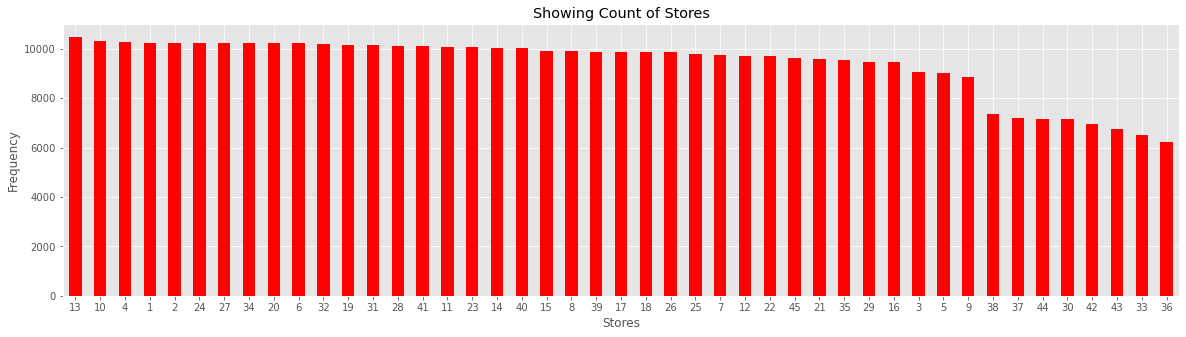

In [46]:
# Plot 1: 
plt.figure(figsize=(20,5))
df_train['Store'].value_counts().plot(kind='bar', color='r')
plt.title('Showing Count of Stores')
plt.xlabel('Stores')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

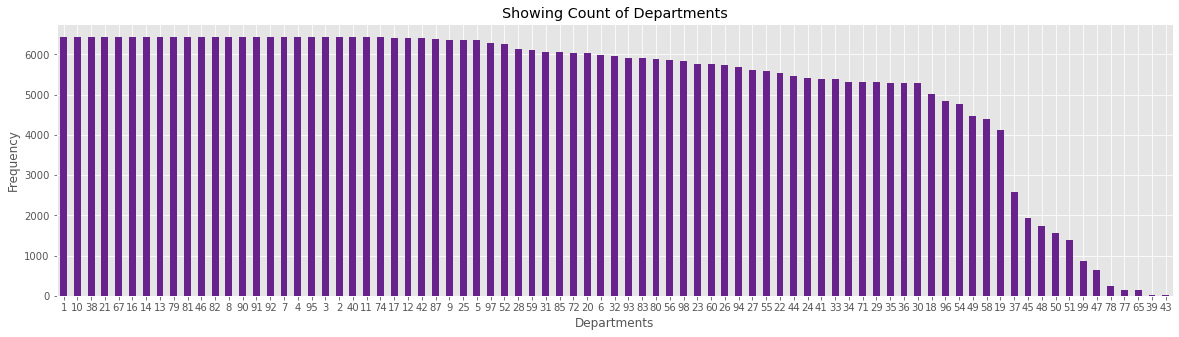

In [47]:
# Plot 2: 
plt.figure(figsize=(20,5))
df_train['Dept'].value_counts().plot(kind='bar', color='#68228b')
plt.title('Showing Count of Departments')
plt.xlabel('Departments')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

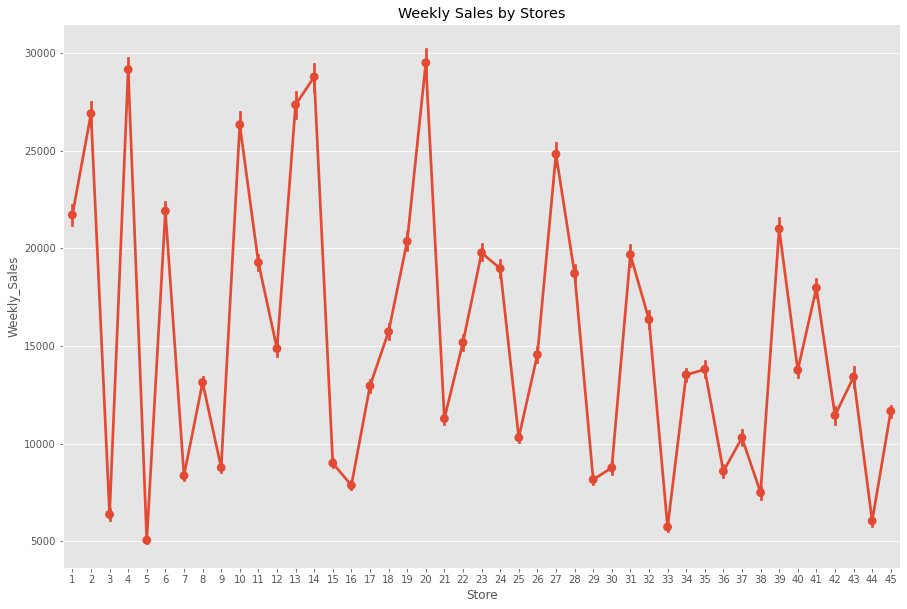

In [48]:
# Plot 3:

plt.figure(figsize=(15,10))
sns.pointplot(df_train['Store'], df_train['Weekly_Sales'])
plt.title('Weekly Sales by Stores')
plt.xticks(rotation=0)
plt.show()

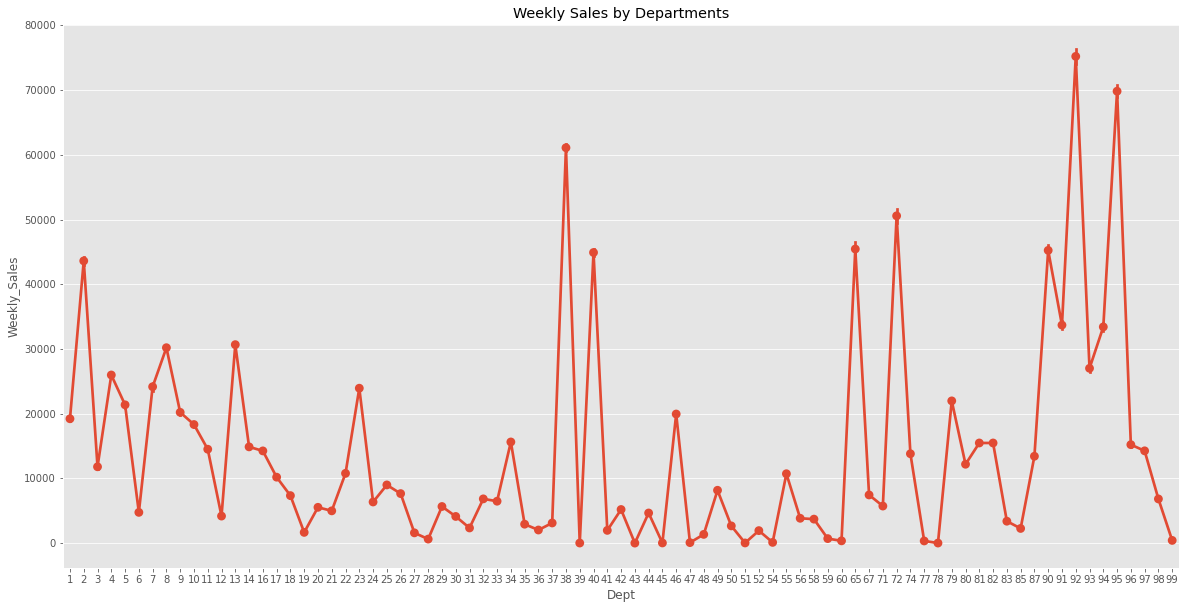

In [49]:
# Plot 4:

plt.figure(figsize=(20,10))
sns.pointplot(df_train['Dept'], df_train['Weekly_Sales'])
plt.title('Weekly Sales by Departments')
plt.xticks(rotation=0)
plt.show()

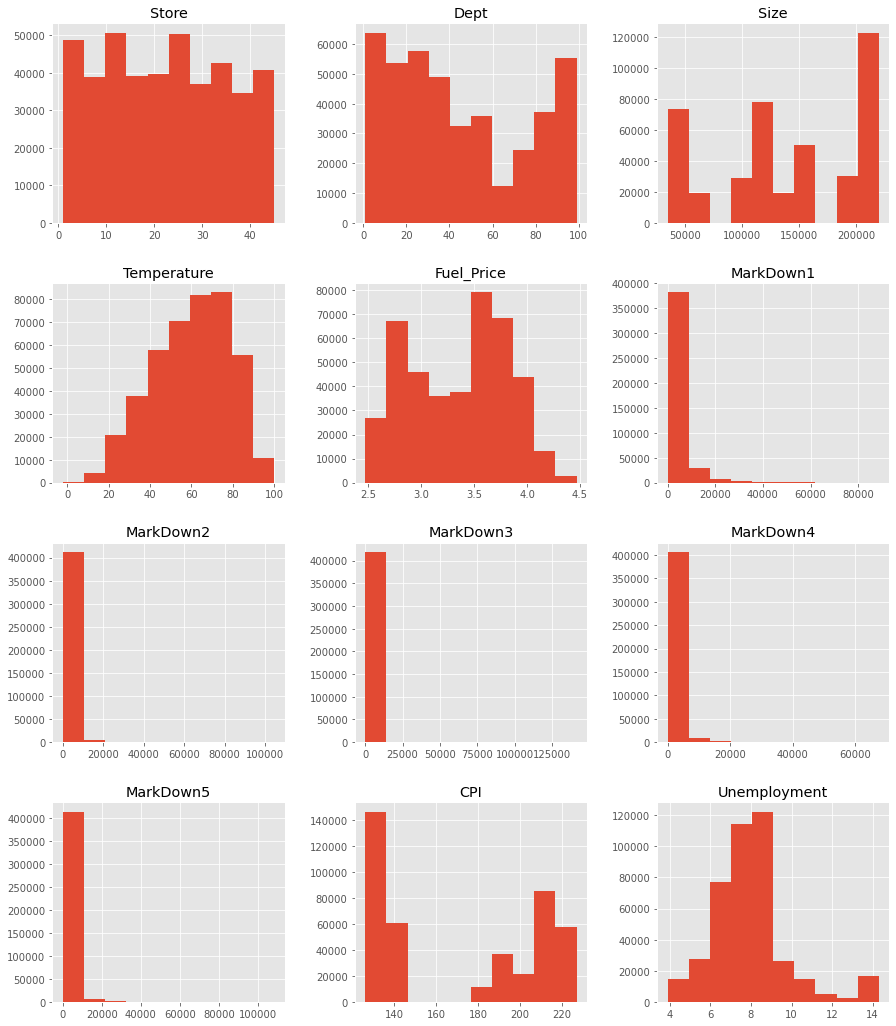

<Figure size 1080x1296 with 0 Axes>

In [50]:
# Plot 5:

def show_hist(x):
    plt.rcParams["figure.figsize"] = 15,18
    x.hist()
    plt.show()
show_hist(df_train[num_vars])

plt.tight_layout()

In [51]:
date_cols = ['Year','Month', 'Quarter', 'Week', 'DayOfWeek']

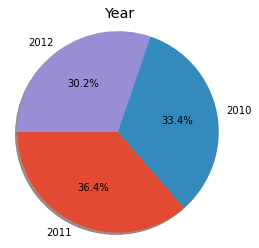

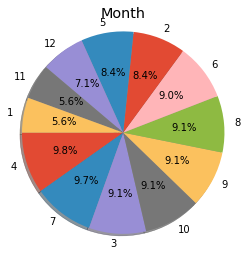

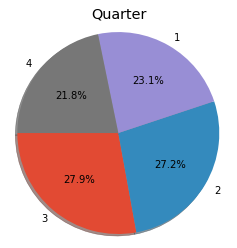

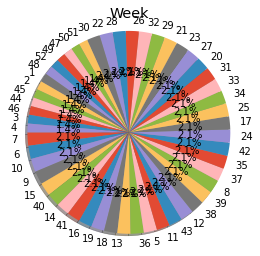

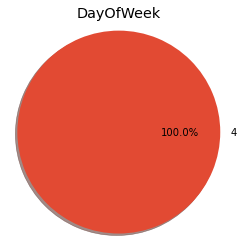

<Figure size 1080x1296 with 0 Axes>

In [52]:
# Plot 6: Checking Distribution of values for each category 

for i in date_cols:
    labels = list(df_train[str(i)].value_counts().index)
    sizes = df_train[str(i)].value_counts()
    plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=180)
    plt.axis('equal')
    plt.title(str(i))
    plt.plot()
    fig=plt.gcf()
    fig.set_size_inches(4,4)
    plt.show()
    plt.tight_layout()

### Bi-Variate Analysis

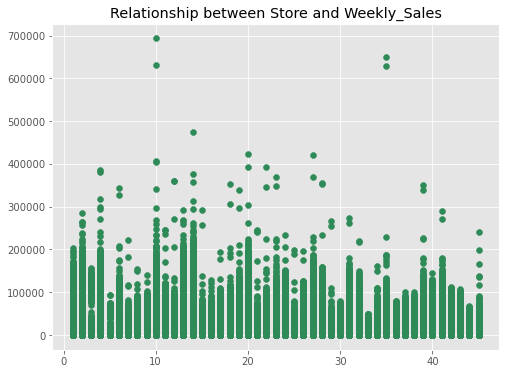

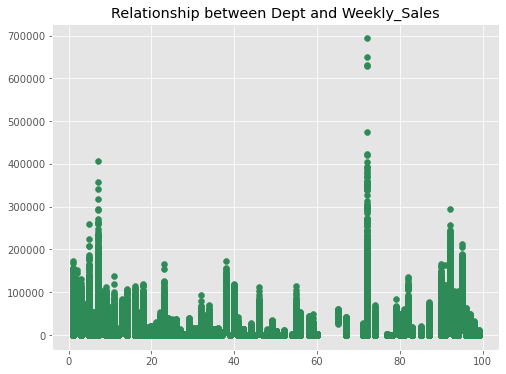

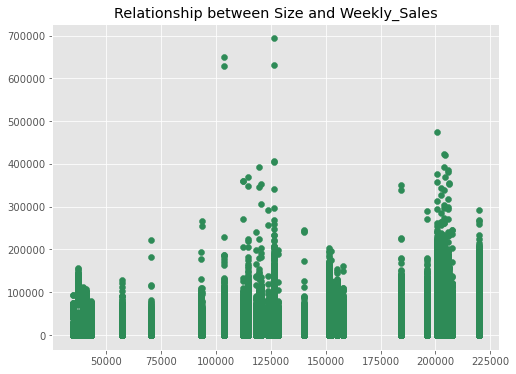

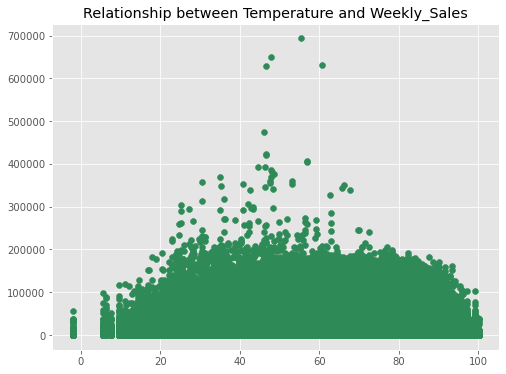

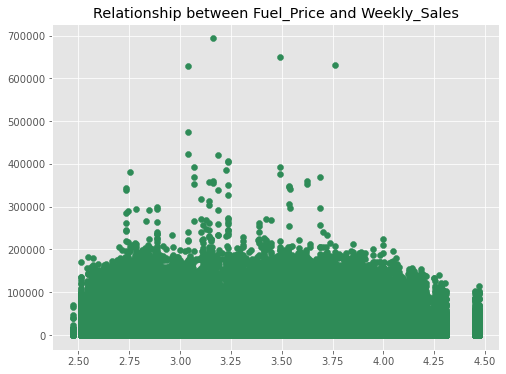

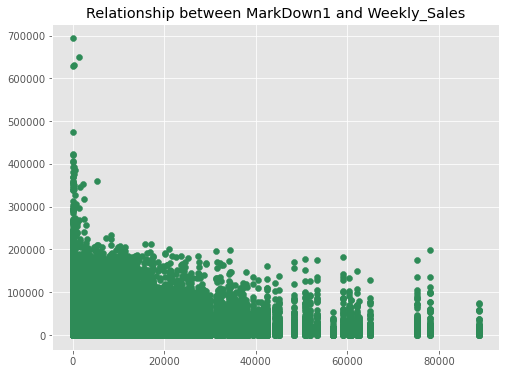

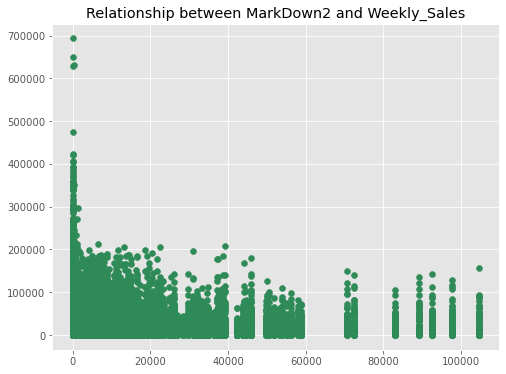

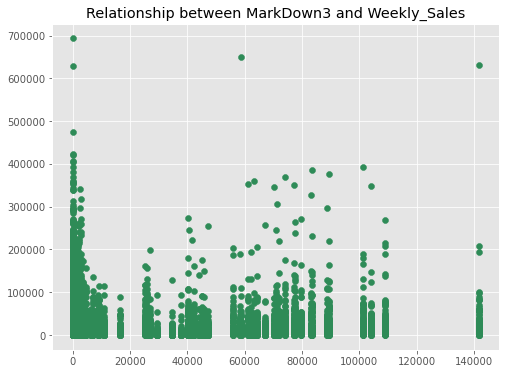

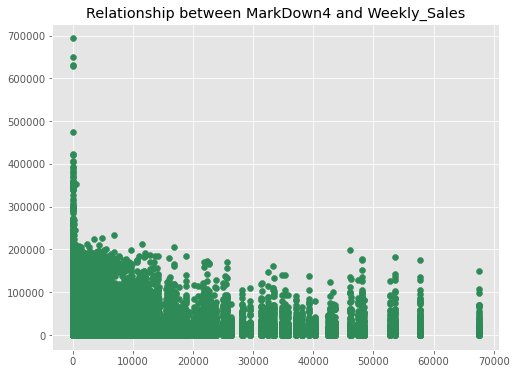

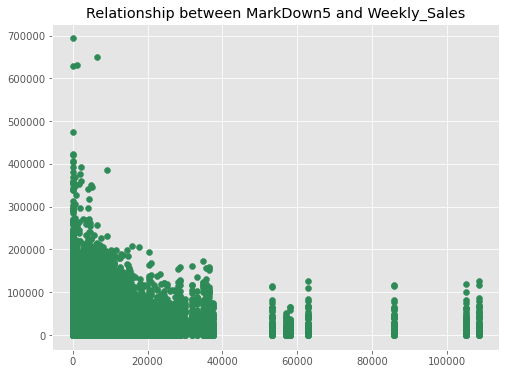

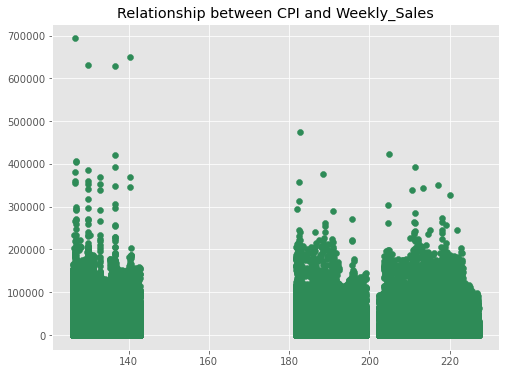

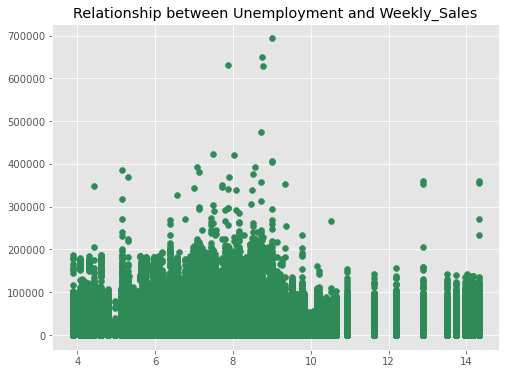

<Figure size 576x432 with 0 Axes>

In [53]:
# Plot 7: 
plt.rcParams["figure.figsize"] = 8,6
for i in num_vars:
    plt.scatter(df_train[i], df_train['Weekly_Sales'], color='#2e8b57')
    plt.title('Relationship between {} and Weekly_Sales'.format(i))
    plt.show()
    
plt.tight_layout()

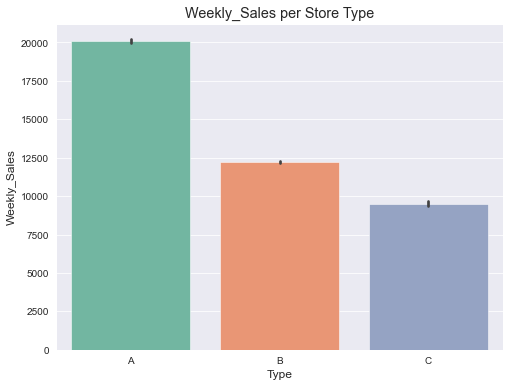

In [54]:
# Plot 8:
sns.set_style('darkgrid')
sns.barplot(df_train['Type'], df_train['Weekly_Sales'], palette='Set2')
plt.title('Weekly_Sales per Store Type')
plt.show()

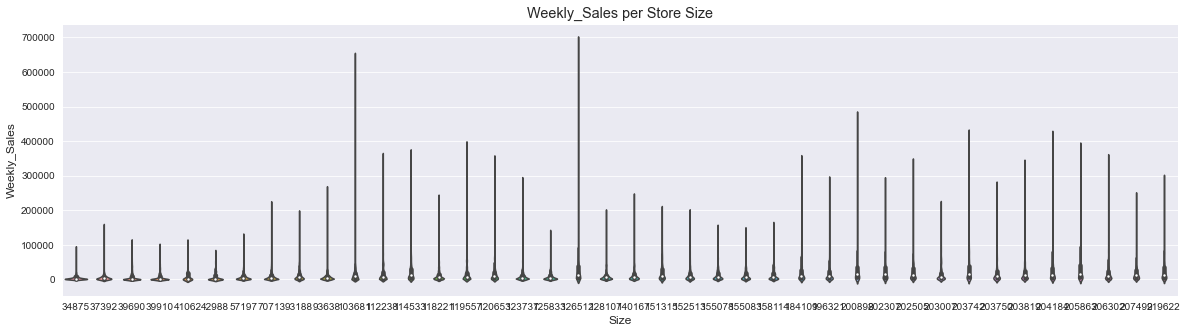

In [55]:
# Plot 9:
plt.figure(figsize = (20,5))
sns.violinplot(x=df_train['Size'], y= df_train['Weekly_Sales'])
plt.title('Weekly_Sales per Store Size')
plt.show()

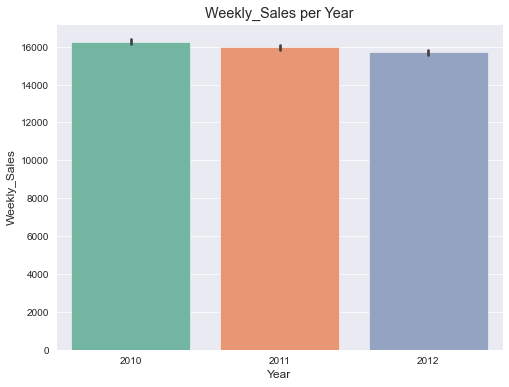

In [56]:
# Plot 10:

sns.barplot(x=df_train['Year'], y= df_train['Weekly_Sales'], palette = 'Set2')
plt.title('Weekly_Sales per Year')
plt.show()

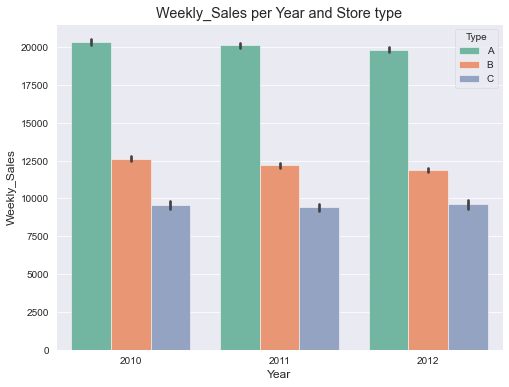

In [57]:
# Plot 11:

sns.barplot(x=df_train['Year'], y= df_train['Weekly_Sales'], hue= df_train['Type'], palette='Set2')
plt.title('Weekly_Sales per Year and Store type')
plt.show()

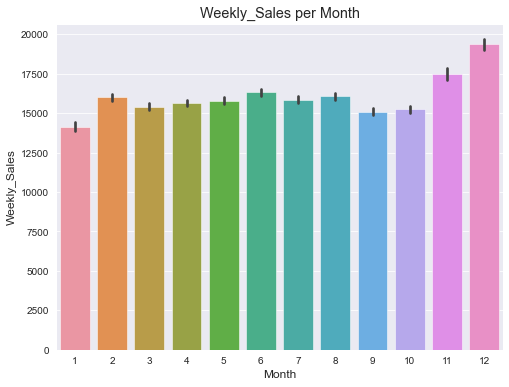

In [58]:
# Plot 12:

sns.barplot(x=df_train['Month'], y= df_train['Weekly_Sales'])
plt.title('Weekly_Sales per Month')
plt.show()

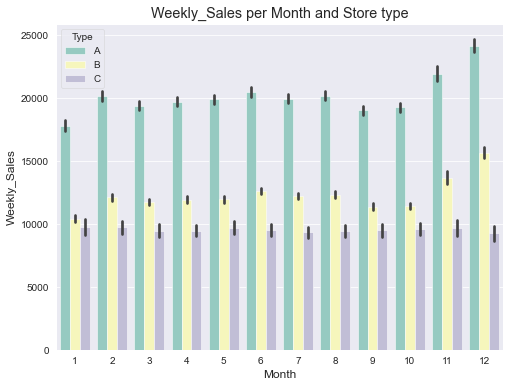

In [59]:
# Plot 13:

sns.barplot(x=df_train['Month'], y= df_train['Weekly_Sales'], hue= df_train['Type'], palette='Set3')
plt.title('Weekly_Sales per Month and Store type')
plt.show()

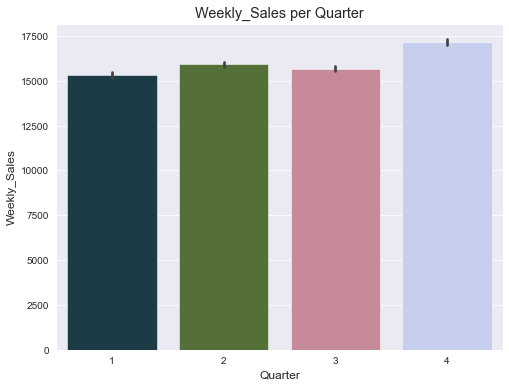

In [60]:
# Plot 14:

sns.barplot(x=df_train['Quarter'], y= df_train['Weekly_Sales'], palette='cubehelix')
plt.title('Weekly_Sales per Quarter')
plt.show()

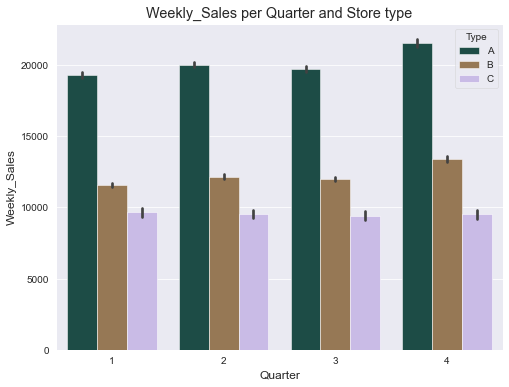

In [61]:
# Plot 15:

sns.barplot(x=df_train['Quarter'], y= df_train['Weekly_Sales'], hue= df_train['Type'], palette='cubehelix')
plt.title('Weekly_Sales per Quarter and Store type')
plt.show()

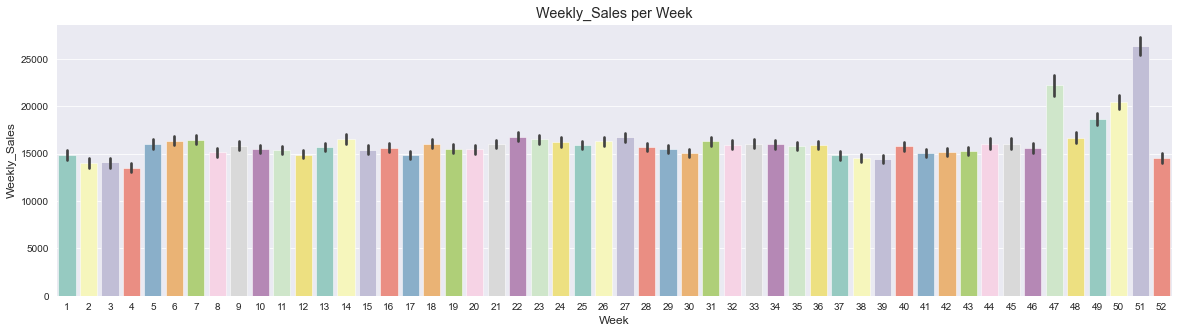

In [62]:
# Plot 16:
plt.figure(figsize = (20,5))
sns.barplot(x=df_train['Week'], y= df_train['Weekly_Sales'], palette='Set3')
plt.title('Weekly_Sales per Week')
plt.show()

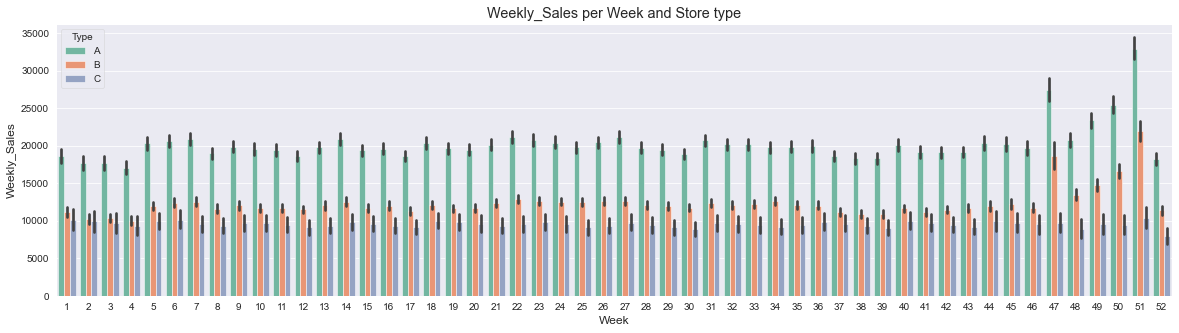

In [63]:
# Plot 17:
plt.figure(figsize = (20,5))
sns.barplot(x=df_train['Week'], y= df_train['Weekly_Sales'], hue= df_train['Type'], palette='Set2')
plt.title('Weekly_Sales per Week and Store type')
plt.show()

#### Avearge Weekly_Sales Sorted by Date in Train data

In [64]:
# Plot 18:

# Step1:  Grouping the Avearge Weekly_Sales Sorted by Date wise:
df1 = df_train.sort_values(by='Date').groupby(['Date'])['Weekly_Sales'].mean()
df1.head()

Date
2010-02-05    16836.167844
2010-02-12    16352.097463
2010-02-19    16216.964169
2010-02-26    14900.183209
2010-03-05    15921.438573
Name: Weekly_Sales, dtype: float64

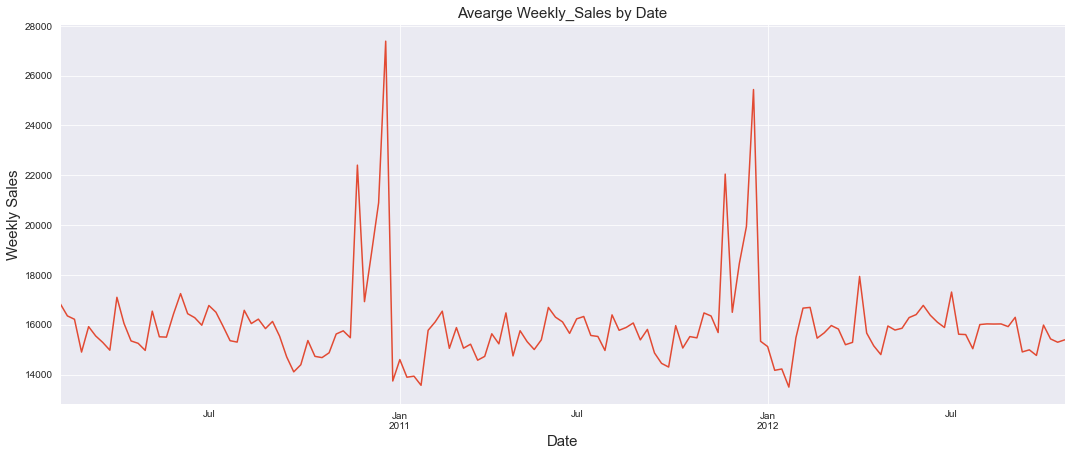

In [65]:
# Step 2: Plotting the graph:
plt.figure(figsize=(18,7))
df1.plot()
plt.title('Avearge Weekly_Sales by Date', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Weekly Sales', fontsize=15)
plt.show()

#### Avearge Weekly_Sales Sorted by Store Type in Train data

In [66]:
# Plot 19 :
# Step1:  Grouping the Avearge Weekly_Sales Sorted by Date and Country wise:
df2 = df_train.groupby(['Date','Type'])['Weekly_Sales'].mean().reset_index()
df2.head()

Date Type  Weekly_Sales
0 2010-02-05    A  21259.412202
1 2010-02-05    B  12859.457015
2 2010-02-05    C   9629.689184
3 2010-02-12    A  20491.151316
4 2010-02-12    B  12490.699014

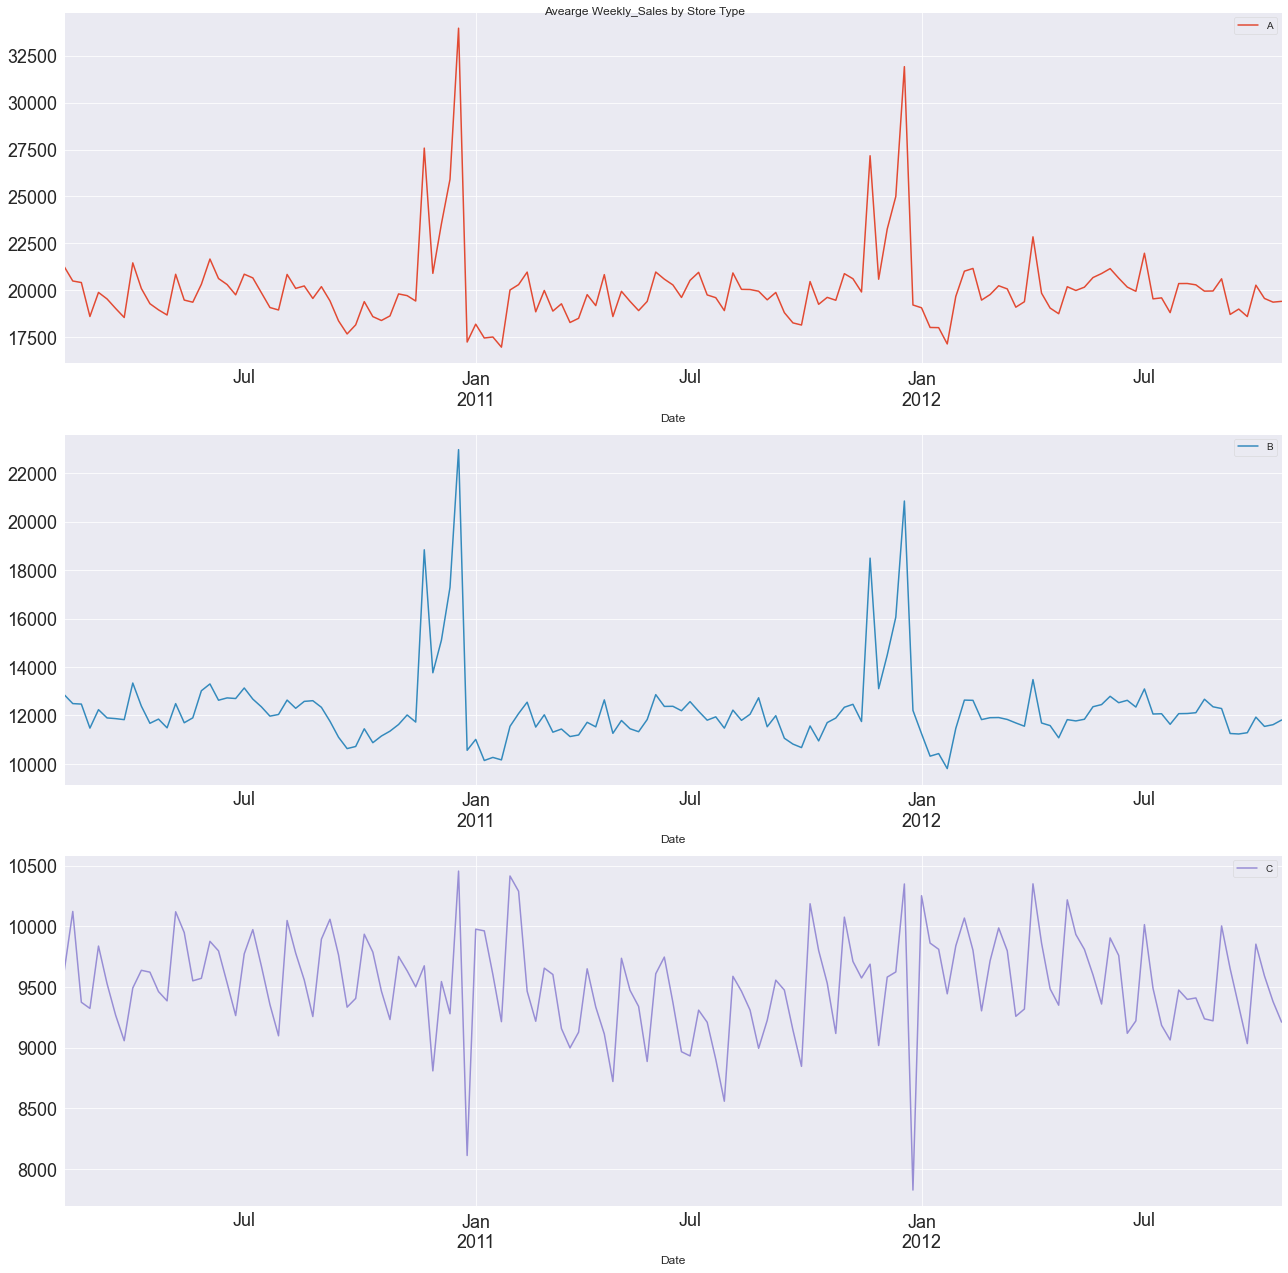

In [67]:
# Step 2: Plotting the graph:

sns.set_style('darkgrid')
_ = df2.pivot_table(index='Date',columns= 'Type', values='Weekly_Sales').plot(subplots=True, figsize=(18,18),
           title='Avearge Weekly_Sales by Store Type', sharex=False, fontsize=18)
plt.tight_layout()
plt.show()

In [68]:
list1 = ['Weekly_Sales','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
list1

['Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

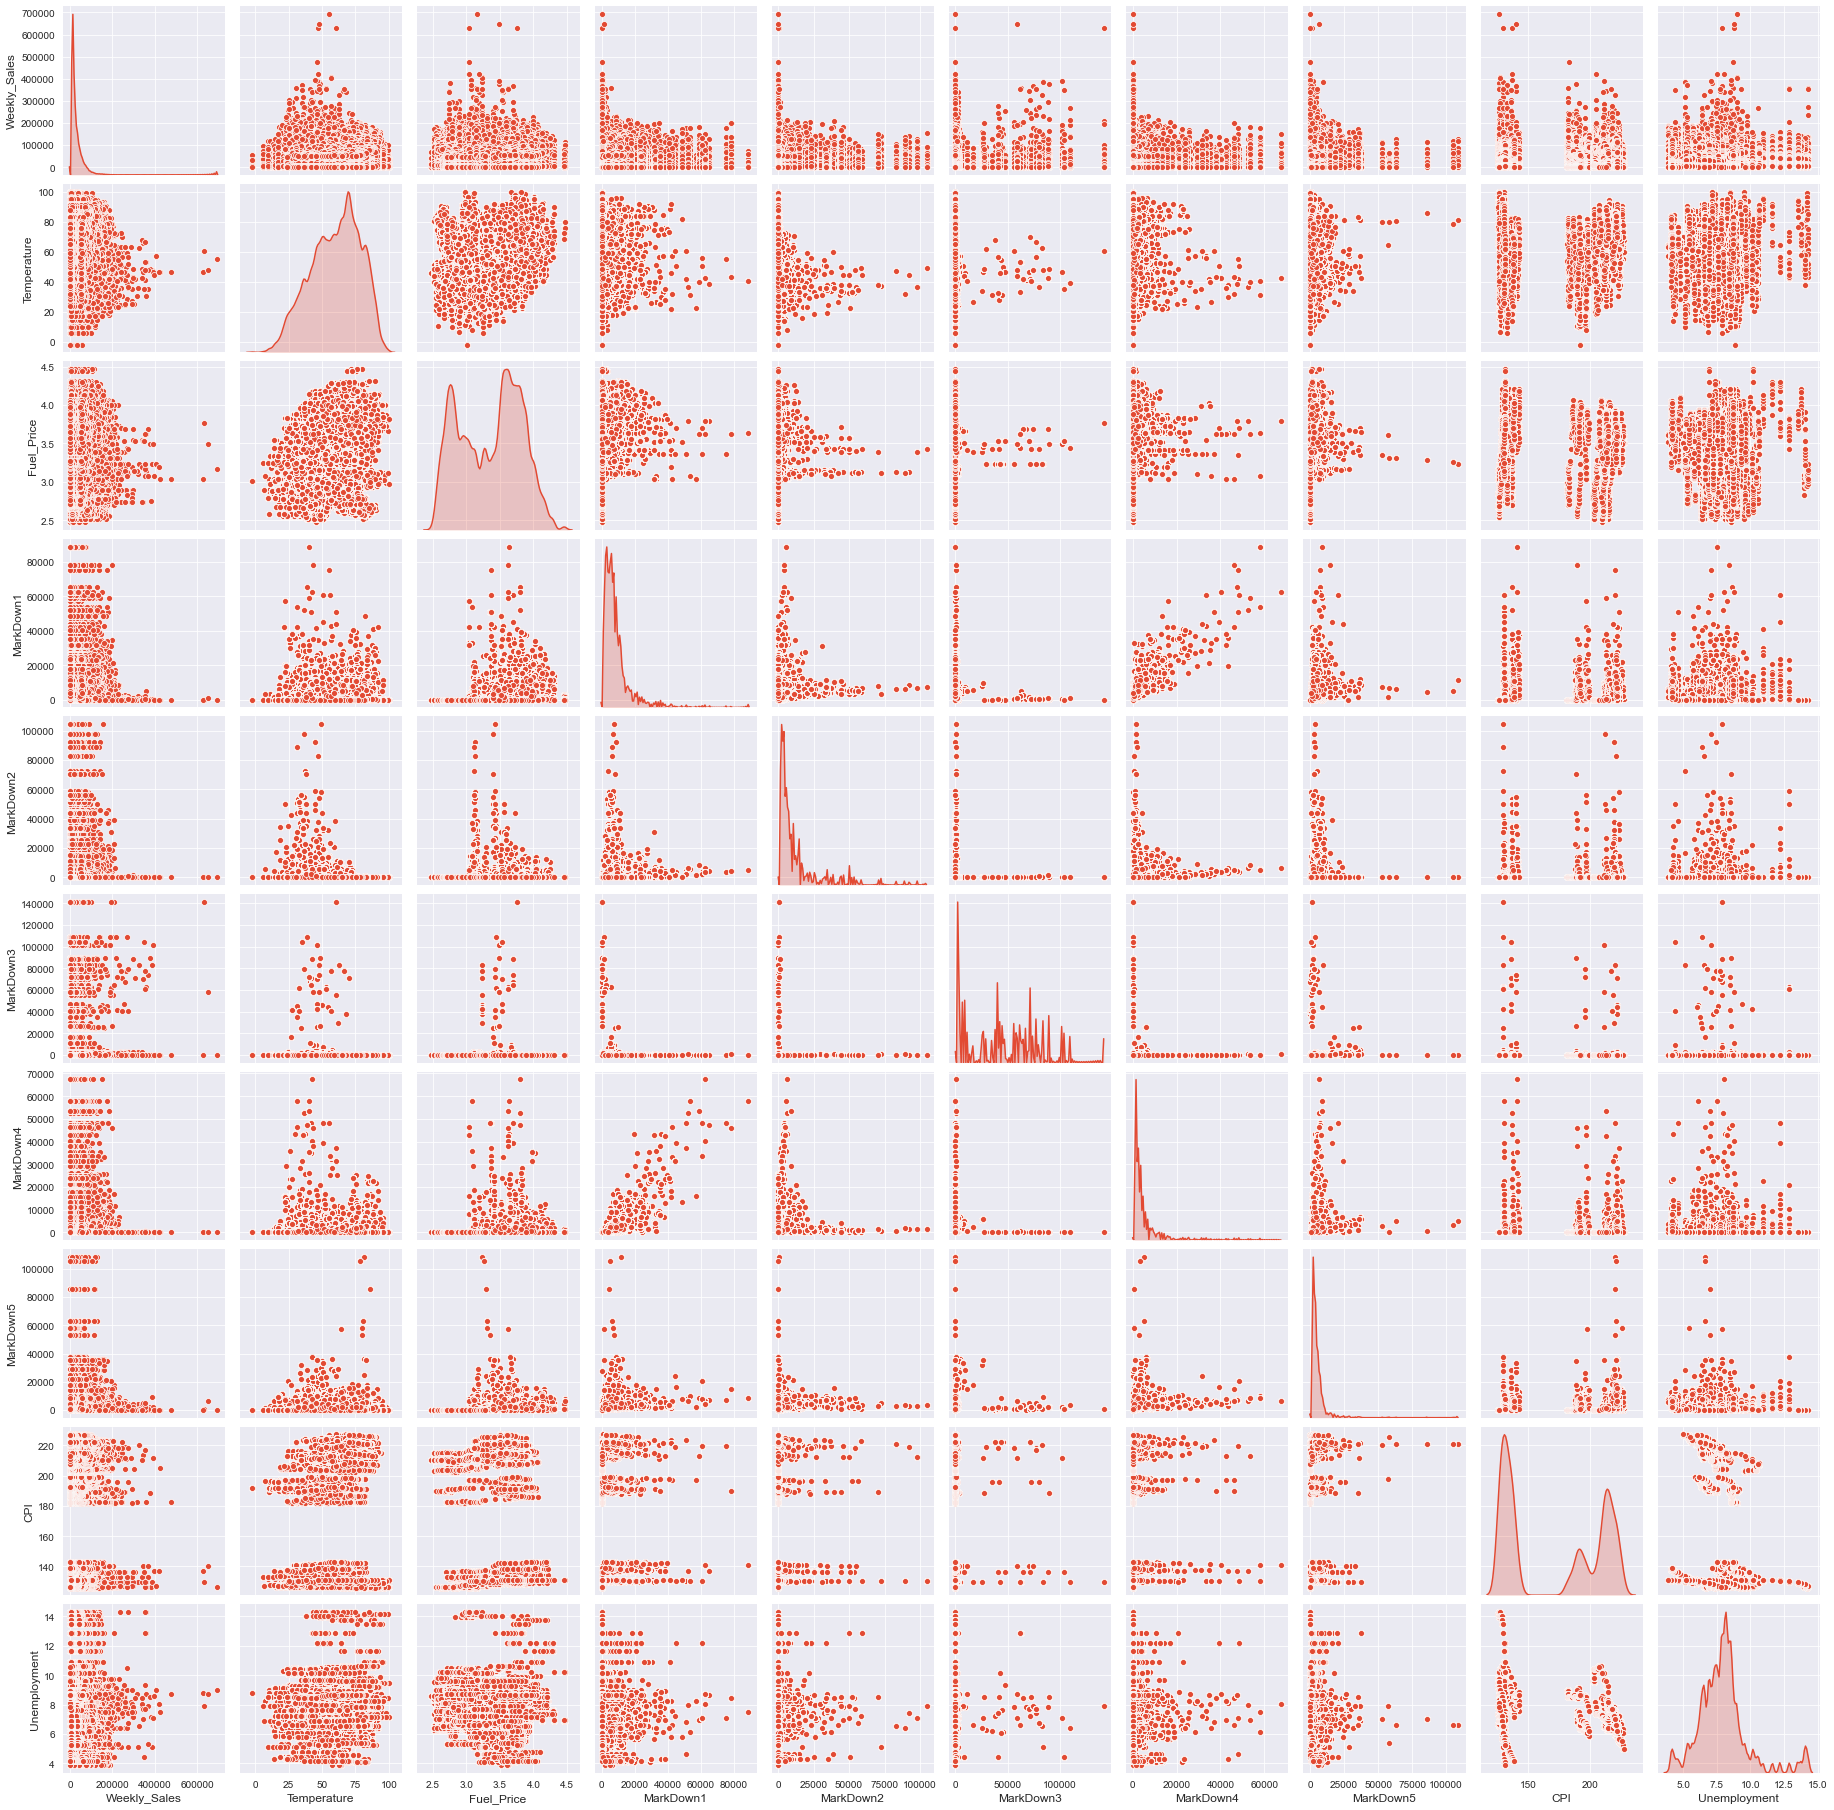

In [69]:
# Plot 20: 
sns.pairplot(df_train[list1], diag_kind='kde')
plt.show()

### Target Variable Distribution

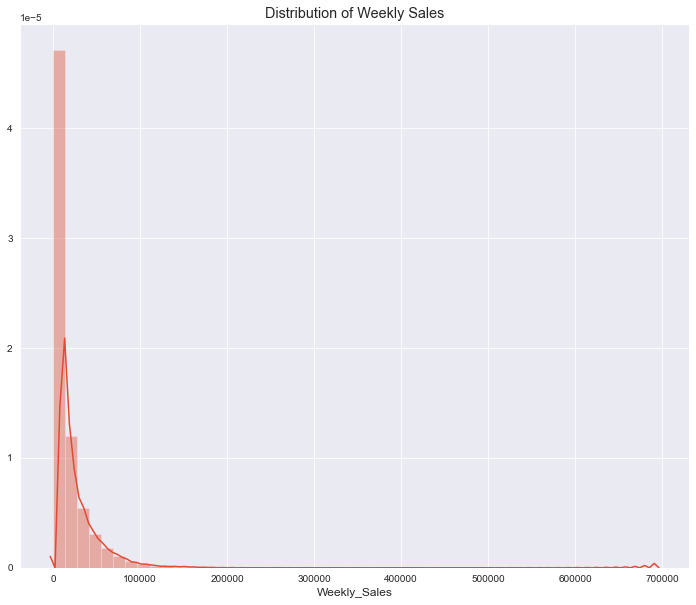

In [70]:
# Plot 21:  Plotting the Distribution for Weekly Sales
plt.figure(figsize=(12,10))
sns.distplot(df_train['Weekly_Sales'])
plt.title('Distribution of Weekly Sales')
plt.show()

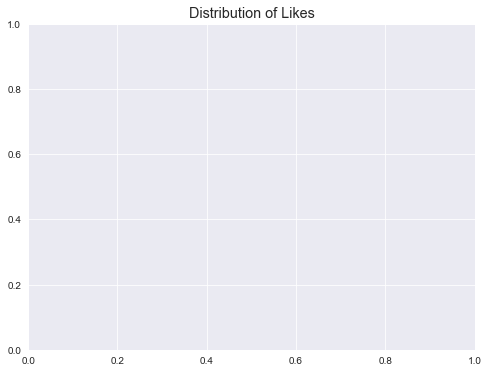

In [71]:
# Plot 22: sns.violinplot(y=df_train['Weekly_Sales'])
plt.title('Distribution of Likes')
plt.show()

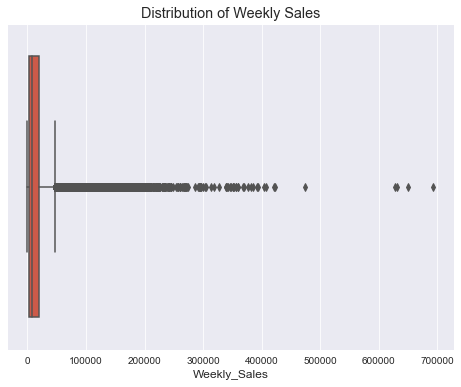

In [72]:
# Plot 23: Box Plot for Weekly_Sales variable:

sns.boxplot(df_train['Weekly_Sales'])
plt.title('Distribution of Weekly Sales')
plt.show()

In [73]:
# Plot 24: Log Transformation of the Dependent Variable:

ln_weekly_sales = np.log(df_train['Weekly_Sales'])
ln_weekly_sales

0         10.123607
1         10.737255
2         10.635748
3          9.873211
4          9.990944
            ...    
421565     6.231210
421566     6.442699
421567     6.966986
421568     6.633332
421569     6.981749
Name: Weekly_Sales, Length: 421570, dtype: float64

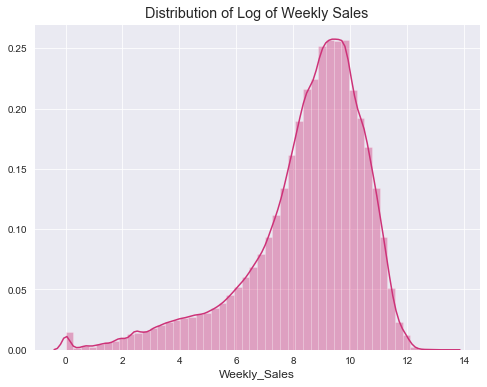

In [74]:
# Plot 25: Log Transformation of the Dependent Variable:

t = np.log1p(df_train['Weekly_Sales'])

sns.distplot(t, color='#cd3278')
plt.title('Distribution of Log of Weekly Sales')
plt.show()

Will not tranform Weekly Sales as will become negative skewed post the transformation.

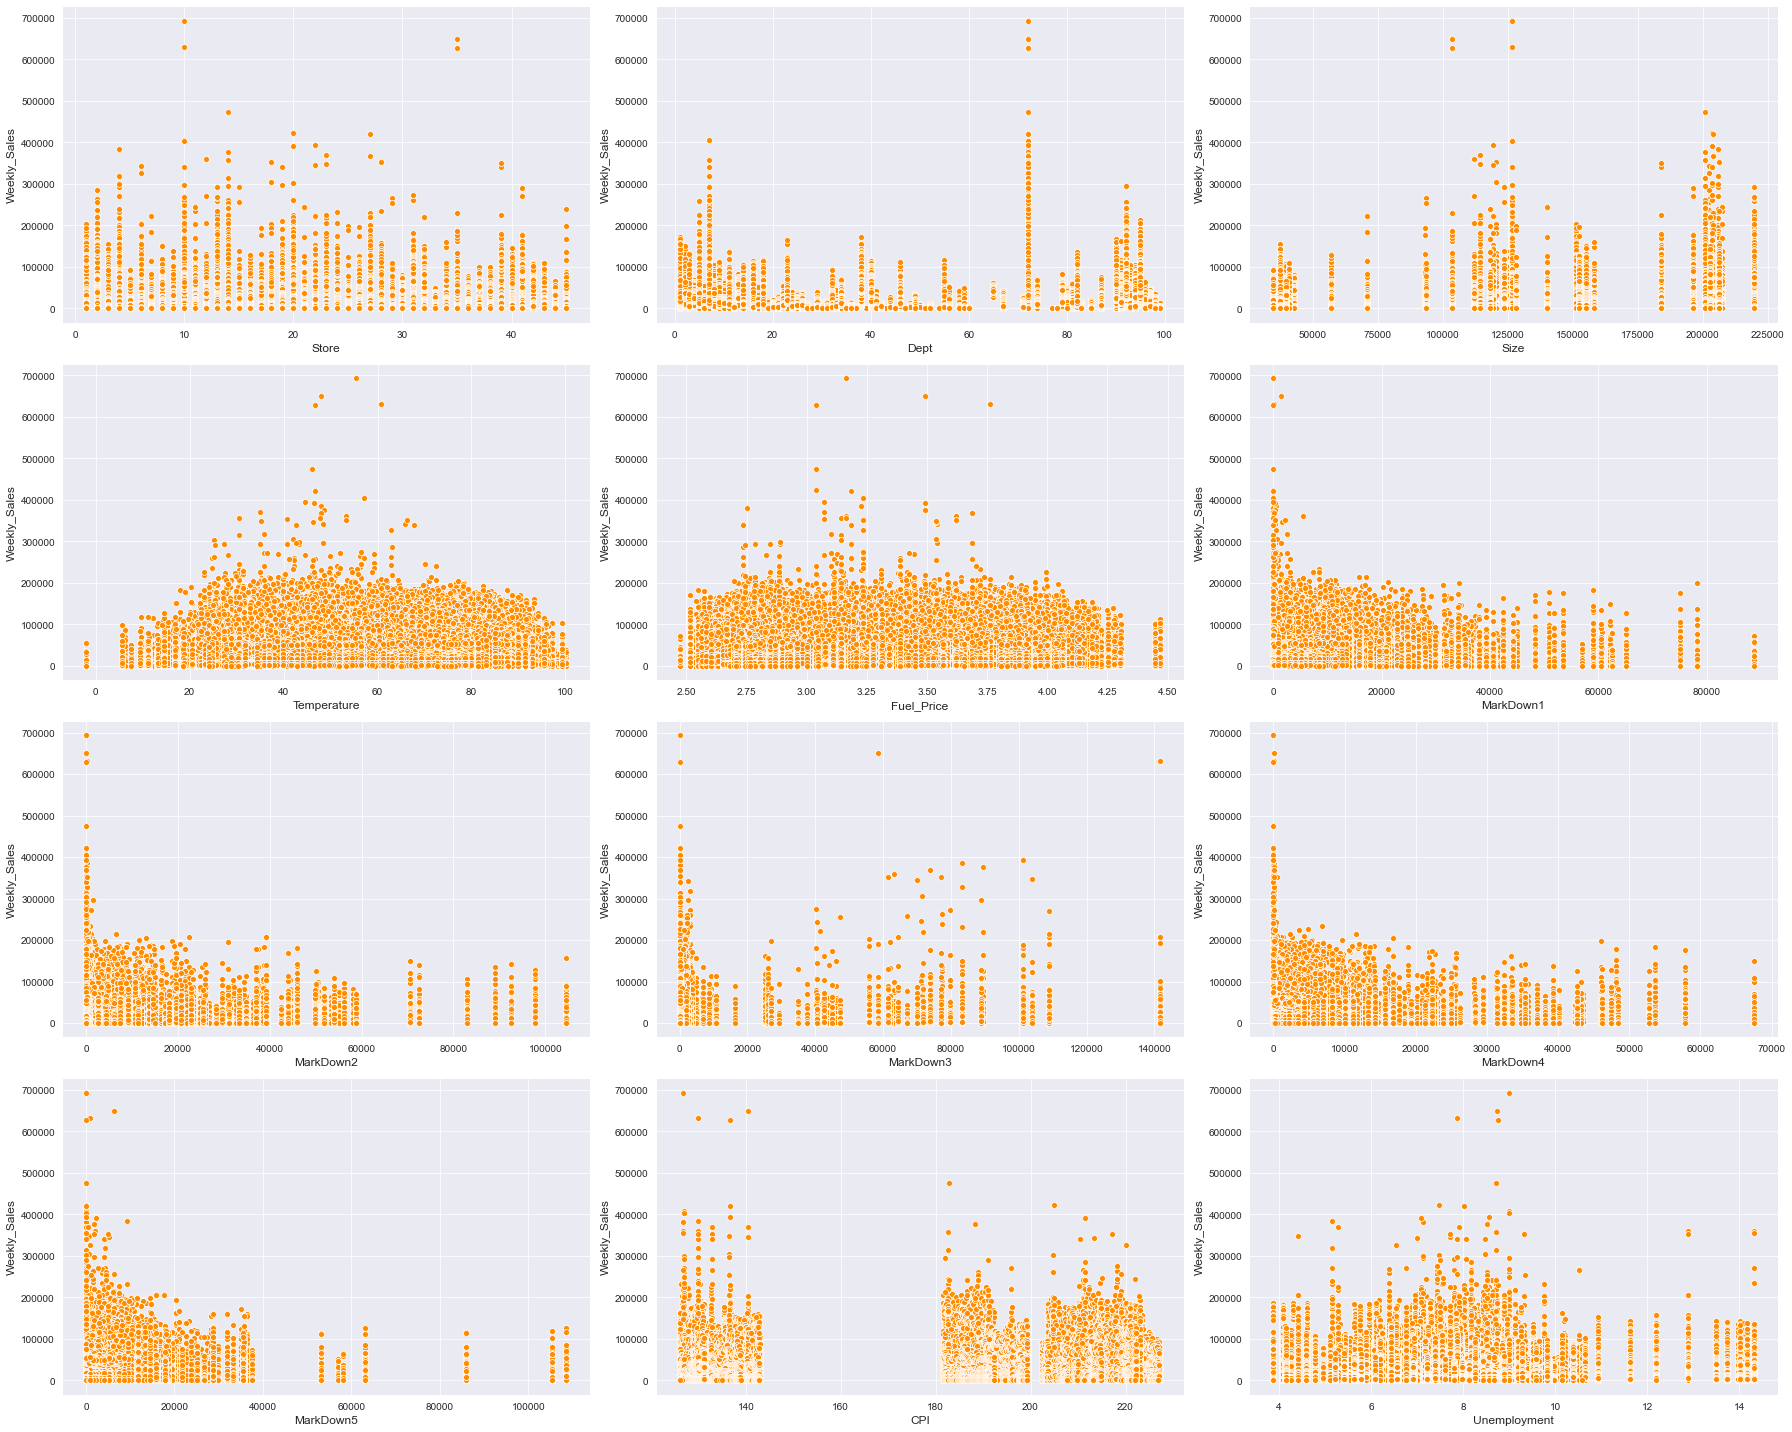

In [75]:
# Plot 26: Subplots showing Relationship between numerical variables and Weekly Sales:

fig, ax = plt.subplots(nrows = 4, ncols= 3, figsize=(25, 20))

for i,j in zip(num_vars, ax.flatten()):
    sns.scatterplot(df_train[i], df_train['Weekly_Sales'], ax=j, color='#ff8c00')
    plt.tight_layout()

plt.show()

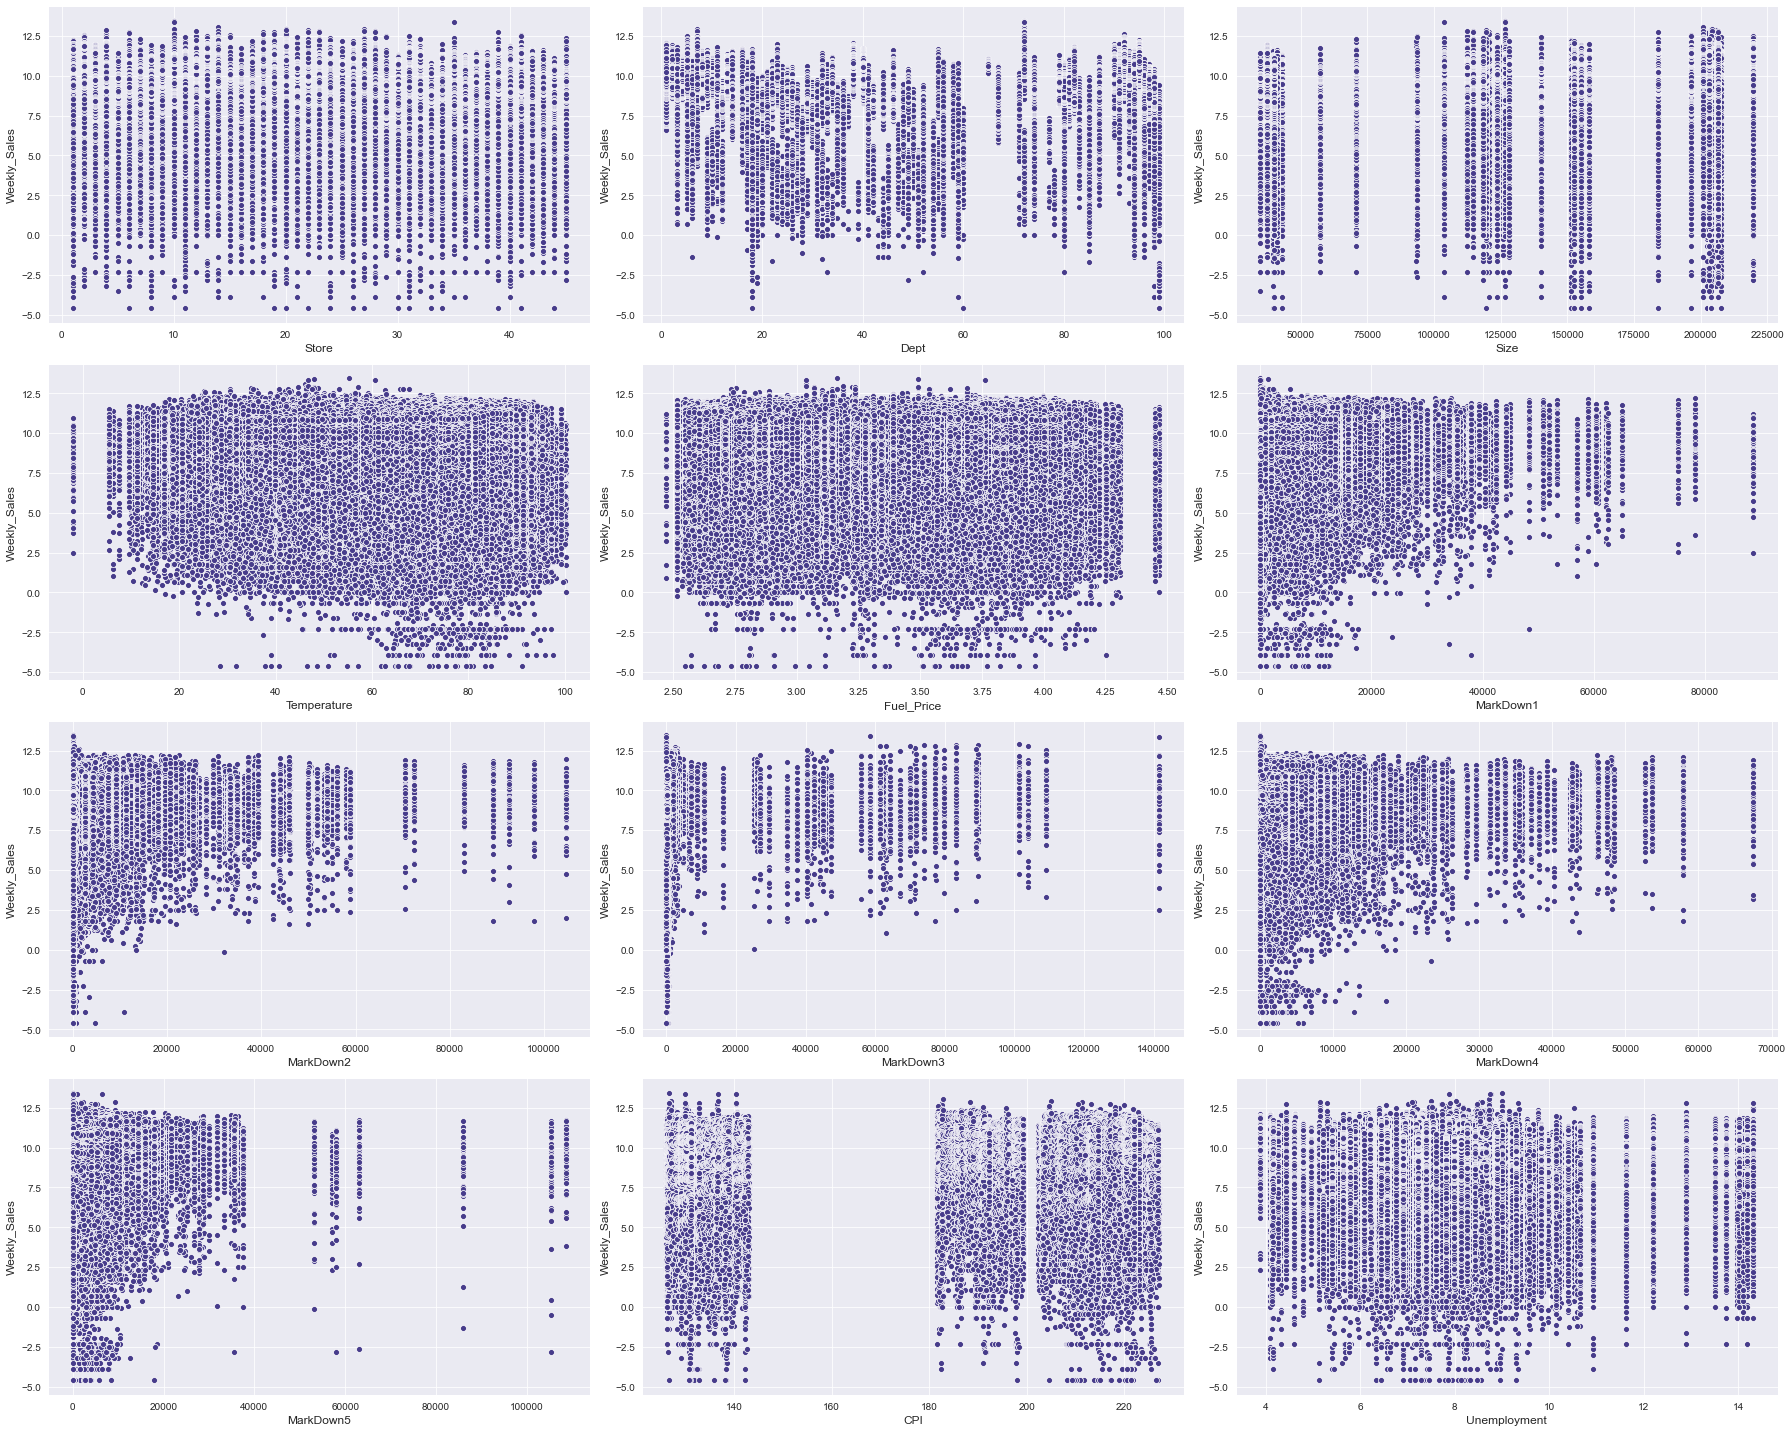

In [76]:
# Plot 27: Subplots showing Relationship between numerical variables and Log of Weekly Sales:

fig, ax = plt.subplots(nrows = 4, ncols= 3, figsize=(25, 20))

for i,j in zip(num_vars, ax.flatten()):
    sns.scatterplot(df_train[i], ln_weekly_sales, ax=j, color='#473c8b')
    plt.tight_layout()

plt.show()

### Correlation Matrix

To check the multicollinearity between the variables.

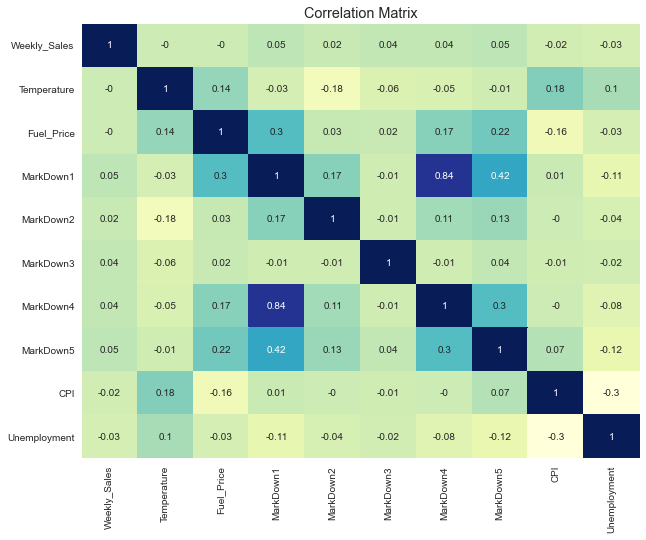

In [77]:
# Plot 28: finding Correlation among the variables:

plt.figure(figsize=(10,8))
sns.heatmap(round(df_train[list1].corr(),2),annot=True, cmap='YlGnBu', cbar= False)
plt.title('Correlation Matrix')
plt.show()

#### Inference from Correlation Matrix:

The correlation value above 0.50 is considered to be highly correlated. From the above heatmap, we can observe:
MarkDown1 and MarkDown4 are highly correlated with correlation of 0.84.
Out of MarkDown1 and Markdown4 will be deleting MarkDown1 since it is correlated with other variables as well.


### Feature Engineering

#### Creation of Holiday Variables

We will be creating four helper columns: SuperBowl, LaborDay, ThanksGiving and Christmas to help mark the IsHoliday variable as 1 and 0 if any of these special holidays exist or not. 

In [78]:
# Creation of holiday variables and adding to the Train data:

df_train['SuperBowl'] = np.where(((df_train['Date'] == dt.datetime(2010, 2, 12)) 
                                  | (df_train['Date'] == dt.datetime(2011, 2, 11)) |
                                  (df_train['Date'] == dt.datetime(2012, 2, 10)) |
                                  (df_train['Date'] == dt.datetime(2013, 2, 8))),1,0)


df_train['LaborDay'] = np.where(((df_train['Date'] == dt.datetime(2010, 9, 10)) 
                                  | (df_train['Date'] == dt.datetime(2011, 9, 9)) |
                                  (df_train['Date'] == dt.datetime(2012, 9, 7)) |
                                  (df_train['Date'] == dt.datetime(2013, 9, 6))),1,0)

df_train['Thanksgiving'] = np.where(((df_train['Date'] == dt.datetime(2010, 11, 26)) 
                                  | (df_train['Date'] == dt.datetime(2011, 11,25)) |
                                  (df_train['Date'] == dt.datetime(2012, 11, 23)) |
                                  (df_train['Date'] == dt.datetime(2013, 11, 29))),1,0)

df_train['Christmas'] = np.where(((df_train['Date'] == dt.datetime(2010, 12, 31)) 
                                  | (df_train['Date'] == dt.datetime(2011, 12, 30)) |
                                  (df_train['Date'] == dt.datetime(2012, 12, 28)) |
                                  (df_train['Date'] == dt.datetime(2013, 12, 27))),1,0)

In [79]:
# Creation of holiday variables and adding to the Test data:

df_test['SuperBowl'] = np.where(((df_test['Date'] == dt.datetime(2010, 2, 12)) 
                                  | (df_test['Date'] == dt.datetime(2011, 2, 11)) |
                                  (df_test['Date'] == dt.datetime(2012, 2, 10)) |
                                  (df_test['Date'] == dt.datetime(2013, 2, 8))),1,0)


df_test['LaborDay'] = np.where(((df_test['Date'] == dt.datetime(2010, 9, 10)) 
                                  | (df_test['Date'] == dt.datetime(2011, 9, 9)) |
                                  (df_test['Date'] == dt.datetime(2012, 9, 7)) |
                                  (df_test['Date'] == dt.datetime(2013, 9, 6))),1,0)

df_test['Thanksgiving'] = np.where(((df_test['Date'] == dt.datetime(2010, 11, 26)) 
                                  | (df_test['Date'] == dt.datetime(2011, 11,25)) |
                                  (df_test['Date'] == dt.datetime(2012, 11, 23)) |
                                  (df_test['Date'] == dt.datetime(2013, 11, 29))),1,0)

df_test['Christmas'] = np.where(((df_test['Date'] == dt.datetime(2010, 12, 31)) 
                                  | (df_test['Date'] == dt.datetime(2011, 12, 30)) |
                                  (df_test['Date'] == dt.datetime(2012, 12, 28)) |
                                  (df_test['Date'] == dt.datetime(2013, 12, 27))),1,0)

Mapping special holidays as holidays 1 and 0 for Train and Test data:

In [80]:
# Marking special holidays as holidays 1 and 0 for Train and Test data:

# Train data: 

df_train['IsHoliday']= df_train['IsHoliday']| df_train['SuperBowl']| df_train['LaborDay']|df_train['Thanksgiving']|df_train['Christmas']


# Test data: 

df_test['IsHoliday']= df_test['IsHoliday']| df_test['SuperBowl']| df_test['LaborDay']|df_test['Thanksgiving']|df_test['Christmas']

Removing the Helper Holiday Columns:

In [81]:
# Dropping the helper columns for both Train and Test Data:

# Train data:
df_train.drop(['SuperBowl', 'LaborDay', 'Thanksgiving', 'Christmas'], axis=1, inplace=True)

# Test data:
df_test.drop(['SuperBowl', 'LaborDay', 'Thanksgiving', 'Christmas'], axis=1, inplace=True)

In [82]:
# Removing correlated variables from Train and Test:

# Train data
#df_train.drop(['MarkDown1'], axis=1, inplace=True)

In [83]:
# Test data
#df_test.drop(['MarkDown1'], axis=1, inplace=True)

In [84]:
#numerical_var = ['Store', 'Dept','Size','Temperature','Fuel_Price','MarkDown2','MarkDown3','MarkDown4','MarkDown5', 'CPI', 'Unemployment']
#cat_var = ['Type', 'IsHoliday']

In [85]:
# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# preprocessing import
from sklearn.preprocessing import PowerTransformer, StandardScaler,OneHotEncoder

# import Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE, f_regression,mutual_info_regression, SelectKBest

# import functions to perform Linear Regression, regularizers and SGDRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, SGDRegressor


# import DT,  ensemble techniques, Support Vector Regressor, KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# import functions to perform cross validation
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold,  GridSearchCV

import itertools

In [86]:
# Re-assiging IsHoliday as Object in Train and Test Data:

df_train['IsHoliday'] = df_train['IsHoliday'].astype('object')
df_test['IsHoliday'] = df_test['IsHoliday'].astype('object')

#### Scaling the numerical Features

In [87]:
list2 = ['Size', 'Temperature', 'Fuel_Price', 'MarkDown2', 
                                       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

In [88]:
SS = StandardScaler()

num_scaled = SS.fit_transform(df_train[['Size', 'Temperature', 'Fuel_Price', 'MarkDown2', 
                                       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']])

df_num_scaled = pd.DataFrame(num_scaled, columns = list2).reset_index(drop=True)
df_num_scaled.head()

Size  Temperature  Fuel_Price  MarkDown2  MarkDown3  MarkDown4  \
0  0.239209    -0.963798   -1.720834  -0.173088  -0.084663  -0.278117   
1  0.239209    -1.169783   -1.773177  -0.173088  -0.084663  -0.278117   
2  0.239209    -1.092810   -1.847330  -0.173088  -0.084663  -0.278117   
3  0.239209    -0.729625   -1.744825  -0.173088  -0.084663  -0.278117   
4  0.239209    -0.736672   -1.605243  -0.173088  -0.084663  -0.278117   

   MarkDown5       CPI  Unemployment  
0  -0.395181  1.018774      0.078201  
1  -0.395181  1.022498      0.078201  
2  -0.395181  1.023697      0.078201  
3  -0.395181  1.024476      0.078201  
4  -0.395181  1.025255      0.078201

#### Dummy Creation of the categorical Features

In [89]:
df_train['Type'] = 'Type_' + df_train['Type'].map(str)
df_train['Store'] = 'Store_' + df_train['Store'].map(str)
df_train['Dept'] = 'Dept_' + df_train['Dept'].map(str)
df_train['Year'] = 'Year_' + df_train['Year'].map(str)
df_train['Month'] = 'Month_' + df_train['Month'].map(str)
df_train['Week'] = 'Week_' + df_train['Week'].map(str)
df_train['Quarter'] = 'Quarter_' + df_train['Quarter'].map(str)

In [90]:
x_dummy_train  = pd.get_dummies(df_train[['Store','Dept','Type','IsHoliday','Month','Week','Quarter']], drop_first = True)

x_dummy_train  = x_dummy_train.reset_index(drop=True)
x_dummy_train.head()

Store_Store_10  Store_Store_11  Store_Store_12  Store_Store_13  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_14  Store_Store_15  Store_Store_16  Store_Store_17  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_18  Store_Store_19  Store_Store_2  Store_Store_20  \
0               0               0              0               0   
1               0               0              0               0   
2               0               0              0               0   
3               0               0              0               0   
4               0               0              0               0   

   Store_Store_21  Store_Store_22  Store_Store_23  Store_Store_24  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_25  Store_Store_26  Store_Store_27  Store_Store_28  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_29  Store_Store_3  Store_Store_30  Store_Store_31  \
0               0              0               0               0   
1               0              0               0               0   
2               0              0               0               0   
3               0              0               0               0   
4               0              0               0               0   

   Store_Store_32  Store_Store_33  Store_Store_34  Store_Store_35  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_36  Store_Store_37  Store_Store_38  Store_Store_39  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_4  Store_Store_40  Store_Store_41  Store_Store_42  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   Store_Store_43  Store_Store_44  Store_Store_45  Store_Store_5  \
0               0               0               0              0   
1               0               0               0              0   
2               0               0               0              0   
3             

In [91]:
#### Concatenating all the date features, dummy variables and scaled dataset:

x_final = pd.concat([df_num_scaled, x_dummy_train], axis=1)
x_final.shape

(421570, 201)

In [92]:
x_final.head()

Size  Temperature  Fuel_Price  MarkDown2  MarkDown3  MarkDown4  \
0  0.239209    -0.963798   -1.720834  -0.173088  -0.084663  -0.278117   
1  0.239209    -1.169783   -1.773177  -0.173088  -0.084663  -0.278117   
2  0.239209    -1.092810   -1.847330  -0.173088  -0.084663  -0.278117   
3  0.239209    -0.729625   -1.744825  -0.173088  -0.084663  -0.278117   
4  0.239209    -0.736672   -1.605243  -0.173088  -0.084663  -0.278117   

   MarkDown5       CPI  Unemployment  Store_Store_10  Store_Store_11  \
0  -0.395181  1.018774      0.078201               0               0   
1  -0.395181  1.022498      0.078201               0               0   
2  -0.395181  1.023697      0.078201               0               0   
3  -0.395181  1.024476      0.078201               0               0   
4  -0.395181  1.025255      0.078201               0               0   

   Store_Store_12  Store_Store_13  Store_Store_14  Store_Store_15  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_16  Store_Store_17  Store_Store_18  Store_Store_19  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_2  Store_Store_20  Store_Store_21  Store_Store_22  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   Store_Store_23  Store_Store_24  Store_Store_25  Store_Store_26  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_27  Store_Store_28  Store_Store_29  Store_Store_3  \
0               0               0               0              0   
1               0               0               0              0   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   Store_Store_30  Store_Store_31  Store_Store_32  Store_Store_33  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_34  Store_Store_35  Store_Store_36  Store_Store_37  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_38  Store_Store_39  Store_Store_4  Store_Store_40  \
0               0               0              0               0   
1               0               0              0               0   
2               0               0     

#### Applying the same preprocessing steps on the Test Data

In [93]:
# Scaling the numerical variables:

SS = StandardScaler()

num_scaled_test = SS.fit_transform(df_test[['Size', 'Temperature', 'Fuel_Price', 'MarkDown2', 
                                       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']])

df_num_scaled_test = pd.DataFrame(num_scaled_test, columns = list2).reset_index(drop=True)
df_num_scaled_test.head()

Size  Temperature  Fuel_Price  MarkDown2  MarkDown3  MarkDown4  \
0  0.242483     0.073606   -0.816679   0.317164  -0.162867   0.091459   
1  0.242483     0.389776   -1.117379   0.076827  -0.163666   0.231072   
2  0.242483    -0.054572   -1.376316  -0.339621  -0.158850  -0.256122   
3  0.242483     0.122206   -1.547548  -0.378567   5.515278  -0.384136   
4  0.242483    -0.085548   -1.564254  -0.379131   0.124420  -0.392364   

   MarkDown5       CPI  Unemployment  
0  -0.060961  1.201083     -0.212329  
1   0.114752  1.201620     -0.212329  
2   0.138333  1.202537     -0.212329  
3  -0.186139  1.203959     -0.212329  
4   0.156520  1.205381     -0.212329

In [94]:
df_test['Type'] = 'Type_' + df_test['Type'].map(str)
df_test['Store'] = 'Store_' + df_test['Store'].map(str)
df_test['Dept'] = 'Dept_' + df_test['Dept'].map(str)
df_test['Year'] = 'Year_' + df_test['Year'].map(str)
df_test['Month'] = 'Month_' + df_test['Month'].map(str)
df_test['Week'] = 'Week_' + df_test['Week'].map(str)
df_test['Quarter'] = 'Quarter_' + df_test['Quarter'].map(str)

In [95]:
# Creating dummy variables for the categorical variables:

x_dummy_test  = pd.get_dummies(df_test[['Store','Type','IsHoliday','Year','Month','Week','Quarter']], drop_first = True)

x_dummy_test  = x_dummy_test.reset_index(drop=True)
x_dummy_test.head()

Store_Store_10  Store_Store_11  Store_Store_12  Store_Store_13  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_14  Store_Store_15  Store_Store_16  Store_Store_17  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_18  Store_Store_19  Store_Store_2  Store_Store_20  \
0               0               0              0               0   
1               0               0              0               0   
2               0               0              0               0   
3               0               0              0               0   
4               0               0              0               0   

   Store_Store_21  Store_Store_22  Store_Store_23  Store_Store_24  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_25  Store_Store_26  Store_Store_27  Store_Store_28  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_29  Store_Store_3  Store_Store_30  Store_Store_31  \
0               0              0               0               0   
1               0              0               0               0   
2               0              0               0               0   
3               0              0               0               0   
4               0              0               0               0   

   Store_Store_32  Store_Store_33  Store_Store_34  Store_Store_35  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_36  Store_Store_37  Store_Store_38  Store_Store_39  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_4  Store_Store_40  Store_Store_41  Store_Store_42  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   Store_Store_43  Store_Store_44  Store_Store_45  Store_Store_5  \
0               0               0               0              0   
1               0               0               0              0   
2               0               0               0              0   
3             

In [96]:
#### Concatenating all the date features, dummy variables and scaled dataset:

x_final_test = pd.concat([df_num_scaled_test, x_dummy_test], axis=1)
x_final_test.shape

(115064, 106)

In [97]:
x_final_test.head()

Size  Temperature  Fuel_Price  MarkDown2  MarkDown3  MarkDown4  \
0  0.242483     0.073606   -0.816679   0.317164  -0.162867   0.091459   
1  0.242483     0.389776   -1.117379   0.076827  -0.163666   0.231072   
2  0.242483    -0.054572   -1.376316  -0.339621  -0.158850  -0.256122   
3  0.242483     0.122206   -1.547548  -0.378567   5.515278  -0.384136   
4  0.242483    -0.085548   -1.564254  -0.379131   0.124420  -0.392364   

   MarkDown5       CPI  Unemployment  Store_Store_10  Store_Store_11  \
0  -0.060961  1.201083     -0.212329               0               0   
1   0.114752  1.201620     -0.212329               0               0   
2   0.138333  1.202537     -0.212329               0               0   
3  -0.186139  1.203959     -0.212329               0               0   
4   0.156520  1.205381     -0.212329               0               0   

   Store_Store_12  Store_Store_13  Store_Store_14  Store_Store_15  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_16  Store_Store_17  Store_Store_18  Store_Store_19  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_2  Store_Store_20  Store_Store_21  Store_Store_22  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   Store_Store_23  Store_Store_24  Store_Store_25  Store_Store_26  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_27  Store_Store_28  Store_Store_29  Store_Store_3  \
0               0               0               0              0   
1               0               0               0              0   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   Store_Store_30  Store_Store_31  Store_Store_32  Store_Store_33  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_34  Store_Store_35  Store_Store_36  Store_Store_37  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_38  Store_Store_39  Store_Store_4  Store_Store_40  \
0               0               0              0               0   
1               0               0              0               0   
2               0               0     

In [98]:
x_final.head()

Size  Temperature  Fuel_Price  MarkDown2  MarkDown3  MarkDown4  \
0  0.239209    -0.963798   -1.720834  -0.173088  -0.084663  -0.278117   
1  0.239209    -1.169783   -1.773177  -0.173088  -0.084663  -0.278117   
2  0.239209    -1.092810   -1.847330  -0.173088  -0.084663  -0.278117   
3  0.239209    -0.729625   -1.744825  -0.173088  -0.084663  -0.278117   
4  0.239209    -0.736672   -1.605243  -0.173088  -0.084663  -0.278117   

   MarkDown5       CPI  Unemployment  Store_Store_10  Store_Store_11  \
0  -0.395181  1.018774      0.078201               0               0   
1  -0.395181  1.022498      0.078201               0               0   
2  -0.395181  1.023697      0.078201               0               0   
3  -0.395181  1.024476      0.078201               0               0   
4  -0.395181  1.025255      0.078201               0               0   

   Store_Store_12  Store_Store_13  Store_Store_14  Store_Store_15  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_16  Store_Store_17  Store_Store_18  Store_Store_19  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_2  Store_Store_20  Store_Store_21  Store_Store_22  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   Store_Store_23  Store_Store_24  Store_Store_25  Store_Store_26  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_27  Store_Store_28  Store_Store_29  Store_Store_3  \
0               0               0               0              0   
1               0               0               0              0   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   Store_Store_30  Store_Store_31  Store_Store_32  Store_Store_33  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_34  Store_Store_35  Store_Store_36  Store_Store_37  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Store_Store_38  Store_Store_39  Store_Store_4  Store_Store_40  \
0               0               0              0               0   
1               0               0              0               0   
2               0               0     

In [99]:
d1 = len(x_final.columns) - len(x_final_test.columns)
d1

95

In [100]:
# Missing Columns in X_Test :

missing_cols = [i for i in x_final.columns if i not in x_final_test.columns]
print(missing_cols)

['Dept_Dept_10', 'Dept_Dept_11', 'Dept_Dept_12', 'Dept_Dept_13', 'Dept_Dept_14', 'Dept_Dept_16', 'Dept_Dept_17', 'Dept_Dept_18', 'Dept_Dept_19', 'Dept_Dept_2', 'Dept_Dept_20', 'Dept_Dept_21', 'Dept_Dept_22', 'Dept_Dept_23', 'Dept_Dept_24', 'Dept_Dept_25', 'Dept_Dept_26', 'Dept_Dept_27', 'Dept_Dept_28', 'Dept_Dept_29', 'Dept_Dept_3', 'Dept_Dept_30', 'Dept_Dept_31', 'Dept_Dept_32', 'Dept_Dept_33', 'Dept_Dept_34', 'Dept_Dept_35', 'Dept_Dept_36', 'Dept_Dept_37', 'Dept_Dept_38', 'Dept_Dept_39', 'Dept_Dept_4', 'Dept_Dept_40', 'Dept_Dept_41', 'Dept_Dept_42', 'Dept_Dept_43', 'Dept_Dept_44', 'Dept_Dept_45', 'Dept_Dept_46', 'Dept_Dept_47', 'Dept_Dept_48', 'Dept_Dept_49', 'Dept_Dept_5', 'Dept_Dept_50', 'Dept_Dept_51', 'Dept_Dept_52', 'Dept_Dept_54', 'Dept_Dept_55', 'Dept_Dept_56', 'Dept_Dept_58', 'Dept_Dept_59', 'Dept_Dept_6', 'Dept_Dept_60', 'Dept_Dept_65', 'Dept_Dept_67', 'Dept_Dept_7', 'Dept_Dept_71', 'Dept_Dept_72', 'Dept_Dept_74', 'Dept_Dept_77', 'Dept_Dept_78', 'Dept_Dept_79', 'Dept_Dept_8'

In [101]:
# adding the missing column in x_final_test:

for i in missing_cols:
    x_final_test[i] = 0

x_final_test.shape

(115064, 202)

In [102]:
x_final.shape

(421570, 201)

In [103]:
# Checking for missing columns in x_final:
l1 = x_final.columns
l2 = x_final_test.columns

In [104]:
p = [i for i in l2 if i not in l1]
p

['Year_Year_2013']

In [105]:
df_train.Year.value_counts()

Year_2011    153453
Year_2010    140679
Year_2012    127438
Name: Year, dtype: int64

In [106]:
df_test.Year.value_counts()

Year_2013    88275
Year_2012    26789
Name: Year, dtype: int64

In [107]:
# adding the missing column in x_final:
for i in p:
    x_final[i] = 0

x_final.shape

(421570, 202)

In [108]:
COPY = x_final_test.copy()
COPY.shape

(115064, 202)

### Train and Test Definition

In [109]:
# Y:  Target Variable:

Y = df_train['Weekly_Sales']

# X : independent features:

X = x_final

# X_test 

X_test = x_final_test

In [115]:
# check the dimensions of the train & test subset for 

print("The shape of X_train is:", X.shape)
print("The shape of X_test is:", X_test.shape)
print('')
print("The shape of y_train is:",Y.shape)

The shape of X_train is: (421570, 202)
The shape of X_test is: (115064, 202)

The shape of y_train is: (421570,)


### Feature Selection

In [ ]:
#Performing RFE 
# Feature extraction
model = RandomForestRegressor()
rf = RFE(model,20)
fit_rf = rf.fit(X,Y)

#Creating Data Frame
Result = pd.DataFrame()
Result['Col_name'] = X.columns
Result['Support'] = fit.support_
Result['Rank'] = fit.ranking_
Result.sort_values(['Rank'],ascending =True) 

In [116]:
#Feature Selection using Random Forest:

model = RandomForestRegressor(random_state = 1, max_depth=3, n_jobs=-1)
rfe = RFE(model, n_features_to_select = 20)
rfe = rfe.fit(X,Y)

In [118]:
#Checking accuracy for train and test data
print(rfe.score(X,Y))

0.3423065701614104


In [125]:
#Identifying Key variables and Printing top 20 variables.
feature_importances_RF = pd.DataFrame(rfe.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
RF = pd.DataFrame(feature_importances_RF)
RF = RF.head(20)
lis_rf= RF.index
lis_rf

AttributeError: 'RFE' object has no attribute 'feature_importances_'

Note: I couldn't understand why this error came . Couldn't debug it.

In [129]:
import xgboost

In [130]:
#Feature Selection using XGboost.

xg = xgboost.XGBRegressor(random_state = 1)
xg = xg.fit(X,Y)

#Checking accuracy for train and test data
print("Train and Test Accuracy :")
print(xg.score(X,Y))


Train and Test Accuracy :
0.9347182185468276


In [132]:
#Identifying Key variables and Printing top 20 variables:

feature_importances_XG = pd.DataFrame(xg.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
XG = pd.DataFrame(feature_importances_XG)
XG =XG.head(20)
lis_xg= XG.index
lis_xg

Index(['Dept_Dept_92', 'Dept_Dept_95', 'Dept_Dept_38', 'Dept_Dept_91',
       'Dept_Dept_2', 'Dept_Dept_8', 'Dept_Dept_94', 'Dept_Dept_90',
       'Dept_Dept_40', 'Dept_Dept_72', 'Dept_Dept_4', 'Dept_Dept_13',
       'Dept_Dept_79', 'Dept_Dept_93', 'Dept_Dept_23', 'Dept_Dept_59',
       'Dept_Dept_60', 'Dept_Dept_46', 'Dept_Dept_54', 'Dept_Dept_28'],
      dtype='object')

In [133]:
# Considering XGBoost Feature Technique

train_x = X[lis_xg]
test_x = X_test[lis_xg]
train_y = Y

### Model on All the Features:

In [118]:
## 1) Linear Regression: 

LR = LinearRegression()
LR.fit(X,Y)

y_pred_LR = LR.predict(X_test)

print('Score {}' .format(LR.score(X,Y)))

Score 0.6632850604763835


In [119]:
## 2) Random Forest: 

RF = RandomForestRegressor(n_estimators=100)
RF.fit(X,Y)

y_pred_RF = RF.predict(X_test)

print('Score {}:' .format(RF.score(X,Y)))

Score 0.9957903122315648:


In [120]:
## 3) Decision Tree: 

DT = DecisionTreeRegressor()
DT.fit(X,Y)

y_pred_DT = DT.predict(X_test)

print('Score {}:' .format(DT.score(X,Y)))

Score 1.0:


### Predicting Sales on above Random Forest Full Model:

In [124]:
# Predicting value using Random Forest 
submission = pd.DataFrame({
        "Store_Dept_Date": test.Store.astype(str)+'_'+test.Dept.astype(str)+'_'+test.Date.astype(str),
        "Weekly_Sales": y_pred_RF
    })

submission.to_csv('weekly_sales predicted.csv', index=False)

### Model Building on Features Selected vis XGBoost

In [141]:
lis_xg

Index(['Dept_Dept_92', 'Dept_Dept_95', 'Dept_Dept_38', 'Dept_Dept_91',
       'Dept_Dept_2', 'Dept_Dept_8', 'Dept_Dept_94', 'Dept_Dept_90',
       'Dept_Dept_40', 'Dept_Dept_72', 'Dept_Dept_4', 'Dept_Dept_13',
       'Dept_Dept_79', 'Dept_Dept_93', 'Dept_Dept_23', 'Dept_Dept_59',
       'Dept_Dept_60', 'Dept_Dept_46', 'Dept_Dept_54', 'Dept_Dept_28'],
      dtype='object')

In [133]:
# Considering XGBoost Feature Technique

train_x = X[lis_xg]
test_x = X_test[lis_xg]
train_y = Y

### Linear Regression 

In [136]:
# Linear Regression :
lr = LinearRegression()
lr = lr.fit(train_x,train_y)

# Checking Accuracy for train and Test data
print(lr.score(train_x,train_y))

0.4857055965984852


In [137]:
# MSE: Mean Square Error  for Train Data:

print("Mean Square Error :\n")
print(mean_squared_error(train_y, lr.predict(train_x)))


# RMSE: Root Mean Square Error 
# squared =  False returns RMSE value: 

print("\nRoot Mean Square Error :\n")
print(mean_squared_error(train_y, lr.predict(train_x), squared = False))

Mean Square Error :

265267792.68845746

Root Mean Square Error :

16287.043706224204


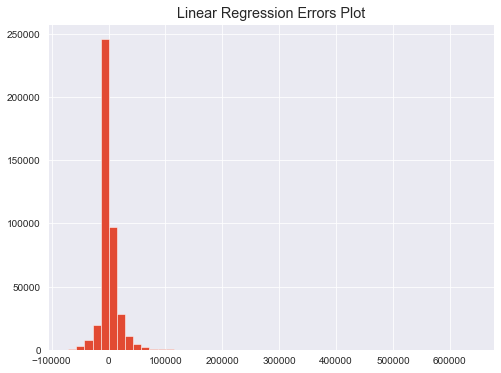

<Figure size 288x288 with 0 Axes>

In [142]:
# Checking Error Distribution :
(train_y-lr.predict(train_x)).hist(bins=50)
plt.title("Linear Regression Errors Plot")
plt.figure(figsize=(4,4))
plt.show()

### Lasso Regression 

In [144]:
#Lasso Regression :
ls = Lasso()
ls = ls.fit(train_x,train_y)

# Checking Accuracy for train and Test data
print(ls.score(train_x,train_y))

0.4857025217141723


In [145]:
# MSE: Mean Square Error  for Train Data:

print("Mean Square Error :\n")
print(mean_squared_error(train_y, ls.predict(train_x)))


# RMSE: Root Mean Square Error 
# squared =  False returns RMSE value: 

print("\nRoot Mean Square Error :\n")
print(mean_squared_error(train_y, ls.predict(train_x), squared = False))

Mean Square Error :

265269378.68233386

Root Mean Square Error :

16287.092394971358


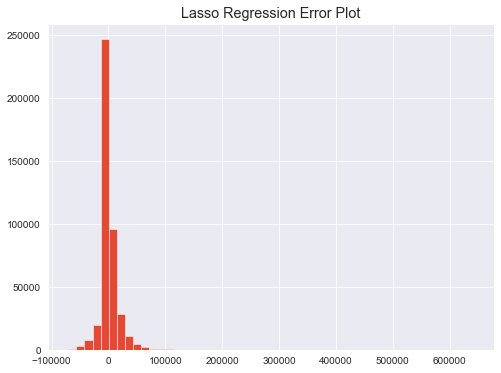

<Figure size 288x288 with 0 Axes>

In [146]:
# Checking Error Distribution :
(train_y-ls.predict(train_x)).hist(bins=50)
plt.title("Lasso Regression Error Plot")
plt.figure(figsize=(4,4))
plt.show()

### Ridge Regression 

In [147]:
# Ridge Regression :
rg = Ridge()
rg = rg.fit(train_x,train_y)

In [149]:
#Checking Accuracy for train and Test data
print(rg.score(train_x,train_y))


0.4857055790103184


In [150]:
# MSE: Mean Square Error  for Train Data:

print("Mean Square Error :\n")
print(mean_squared_error(train_y, rg.predict(train_x)))


# RMSE: Root Mean Square Error 
# squared =  False returns RMSE value: 

print("\nRoot Mean Square Error :\n")
print(mean_squared_error(train_y, rg.predict(train_x), squared = False))

Mean Square Error :

265267801.760254

Root Mean Square Error :

16287.043984721537


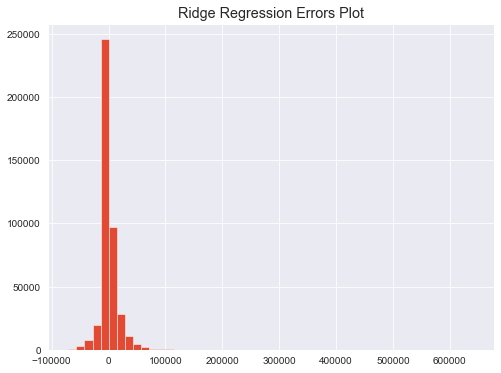

<Figure size 288x288 with 0 Axes>

In [151]:
# Checking Error Distribution :
(train_y-rg.predict(train_x)).hist(bins=50)
plt.title("Ridge Regression Errors Plot")
plt.figure(figsize=(4,4))
plt.show()

### Decision Tree

In [153]:
# Decision tree with tuning parameters.
param_dt = {'max_depth': [5,6,7,8,10],'max_features':[8,12,15,20]}
dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1234), param_grid=param_dt, cv=3,verbose=True, n_jobs=-1)
dt = dt.fit(train_x,train_y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   25.3s finished


In [154]:
# Checking Accuracy for train and Test data
print(dt.score(train_x,train_y))

0.43519702920115655


In [156]:
# Predicting values for train and test data sets.
pred_dt_train = dt.predict(train_x)
pred_dt_test = dt.predict(test_x)

In [157]:
# MSE: Mean Square Error  for Train Data:

print("Mean Square Error :\n")
print(mean_squared_error(train_y, dt.predict(train_x)))

# RMSE: Root Mean Square Error 
# squared =  False returns RMSE value: 

print("\nRoot Mean Square Error :\n")
print(mean_squared_error(train_y, dt.predict(train_x), squared = False))

Mean Square Error :

291319595.11276925

Root Mean Square Error :

17068.087037297686


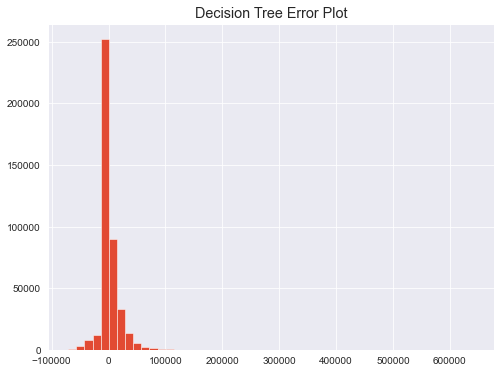

<Figure size 288x288 with 0 Axes>

In [158]:
# Checking Error Distribution :
(train_y-pred_dt_train).hist(bins=50)
plt.title("Decision Tree Error Plot")
plt.figure(figsize=(4,4))
plt.show()

### XGBoost :

In [159]:
# Building Model with different tuning parameters.
param_xg = {'n_estimators': [250,300,400],'max_depth':[8,10]}
xg = GridSearchCV(estimator=xgboost.XGBRegressor(), param_grid=param_xg, cv=3,verbose=True, n_jobs=-1)
xg = xg.fit(train_x,train_y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 17.1min finished


In [160]:
# Checking Accuracy for train and Test data
print(xg.score(train_x,train_y))

0.48570559659846946


In [161]:
# Predicting values for train and test
pred_xg_train = xg.predict(train_x)
pred_xg_test = xg.predict(test_x)

In [162]:
# MSE: Mean Square Error  for Train Data:

print("Mean Square Error :\n")
print(mean_squared_error(train_y, ls.predict(train_x)))

# RMSE: Root Mean Square Error 
# squared =  False returns RMSE value: 

print("\nRoot Mean Square Error :\n")
print(mean_squared_error(train_y, ls.predict(train_x), squared = False))

Mean Square Error :

265269378.68233386

Root Mean Square Error :

16287.092394971358


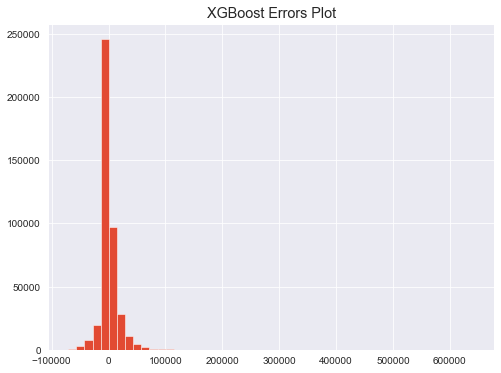

<Figure size 288x288 with 0 Axes>

In [163]:
# Checking Error Distribution :
(train_y-pred_xg_train).hist(bins=50)
plt.title("XGBoost Errors Plot")
plt.figure(figsize=(4,4))
plt.show()

In [130]:
#Exporting results into Excel.
Results.to_excel("Result.xlsx")

-----------------